**2장 – 머신러닝 프로젝트 처음부터 끝까지**

*머신러닝 부동산 회사에 오신 것을 환영합니다! 여러분이 할 작업은 캘리포니아 지역 주택의 여러 특성을 사용해 중간 가격을 예측하는 것입니다.*

*이 노트북은 2장의 모든 샘플 코드와 연습 문제 정답을 담고 있습니다.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## 깃 연동 코드

### 구글 드라이브 내 폴더에서 GitHub 레포지토리 연동이 이미 완료되었다면 드라이브 마운팅 후 연동된 폴더로 이동해서 진행

In [1]:
# 구글 드라이브 마운팅
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 깃허브와 연동할 폴더로 이동
# cd /content/drive/MyDrive/Colab_Notebooks/Hand_on_ML

In [3]:
# 깃허브에서 생성한 repository clone - access token, 레포지토리 주소, 사용자 ID 채워넣기
# !git clone https://OSsunNO:[access token]@github.com/OSsunNO/mldl-self-study.git

In [4]:
# 연동 폴더 내부에 clone한 레포지토리 폴더 생성되었으므로 이동
# cd mldl-self-study/

### GitHub 연동 완료 후 브랜치 상태 확인 및 Commit 예제

In [5]:
# 연동 후 생성된 레포지토리 폴더로 이동
# cd /content/drive/MyDrive/Colab_Notebooks/Hand_on_ML/mldl-self-study/

In [6]:
# 깃 접근 권한 부여
# !git config --global user.email '1020sunho@naver.com'
# !git config --global user.name 'OSsunNO'

In [7]:
# 브랜치 상태 확인
# !git status

In [8]:
# 구글 드라이브에만 존재하는 파일을 add & commit
# !git add 02_end_to_end_machine_learning_project.ipynb
# !git commit -m "test commit"

In [9]:
# commit한 파일 push
# !git push -u origin main

*코랩에서 맷플롯립과 판다스 그래프에 한글을 쓰려면 다음 코드의 주석을 제거하고 실행하세요*

In [10]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

    # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')
    # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 설정

In [11]:
print("머신러닝 세계에 오신 것을 환영합니다!")

머신러닝 세계에 오신 것을 환영합니다!


파이썬 3.7 또는 그 이상이 필요합니다:

In [12]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1이 필요합니다:

In [13]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# 데이터 가져오기

## 데이터 다운로드하기

In [14]:
# 데이터 다운로드 자동화 코드
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## 데이터 구조 훑어 보기




In [15]:
# 데이터프레임의 head() 메서드를 사용해 처음 다섯 행을 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
# info() 메서드는 데이터에 관한 간략한 설명을 보여줌
# 특히, 전체 행 수, 각  특성의 데이터 타입, Null이 아닌 값의 개수를 확인하는데 유용
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
# ocean_proximity 필드만 object 타입
# 열의 값이 반복되는 것으로 보면 범주형 특성으로 예상
# value_counts() 메서드를 통해 어떤 카테고리가 얼마나 있는지 확인
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
# describe() 메서드로 숫자형 특성의 요약 정보를 확인 - Null 값은 제외한 정보
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


다음 셀은 책에 없습니다. `images/end_to_end_project` 폴더가 없다면 이 폴더를 만들고 고해상도 이미지 저장을 위해 노트북에서 사용할 `save_fig()` 함수를 정의합니다.

In [19]:
# 추가 코드 - 고해상도 PNG 파일로 그래프를 저장하기 위한 코드

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**아래에서 housing 데이터셋에 대한 히스토그램을 통해 알 수 있는 점**

1. median_income (중간 소득) 특성이 US 달러로 표현되어 있지 않고, 전처리되어 있는 상태이다.
<br> -> US 달러로 표현 되어있다기에는 값이 너무 작음
<br> -> 문제는 없지만 어떤 계산을 통해 전처리 된 것인지 이해는 하고 있어야 함 - 0.5~15로 상한/하한 스케일 조정
<br> -> 예를 들어 3은 실제로 약 30,000 달러를 의미)
2. housing_median_age (중간 주택 연도)와 median_hosing_value (중간 주택 가격) 역시 최대/최소를 한정
<br> -> 오른쪽 끝에서 그래프가 심하게 높아지면서 히스토그램이 끝나는 것으로 보아 마지막 값으로 한정되었음을 짐작 가능
<br> -> 중간 주택 가격의 경우 타겟 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있음
<br> -> 문제가 될 지 안될지는 이 시스템의 출력을 사용할 팀과 함께 검토해야 함
<br> -> 정확한 예측값이 필요할 경우, 2 가지 방안이 존재
<br> 1) 한곗값 밖의 구역에 대한 정확한 레이블을 구하기
<br> 2) 훈련 세트에서 이런 구역을 제거하기 ($500,000가 넘는 값에 대한 예측은 평과 결과가 매우 나쁠 것이므로 테스트 세트에서도 제외)
3. 특성들의 스케일이 서로 많이 다름
4. 대부분의 히스토그램에서 오른쪽 꼬리가 더 김. 즉, 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있음
<br> -> 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듦
<br> -> 이런 특성들이 좀 더 종 모양의 분포가 되도록 변형시켜야 함



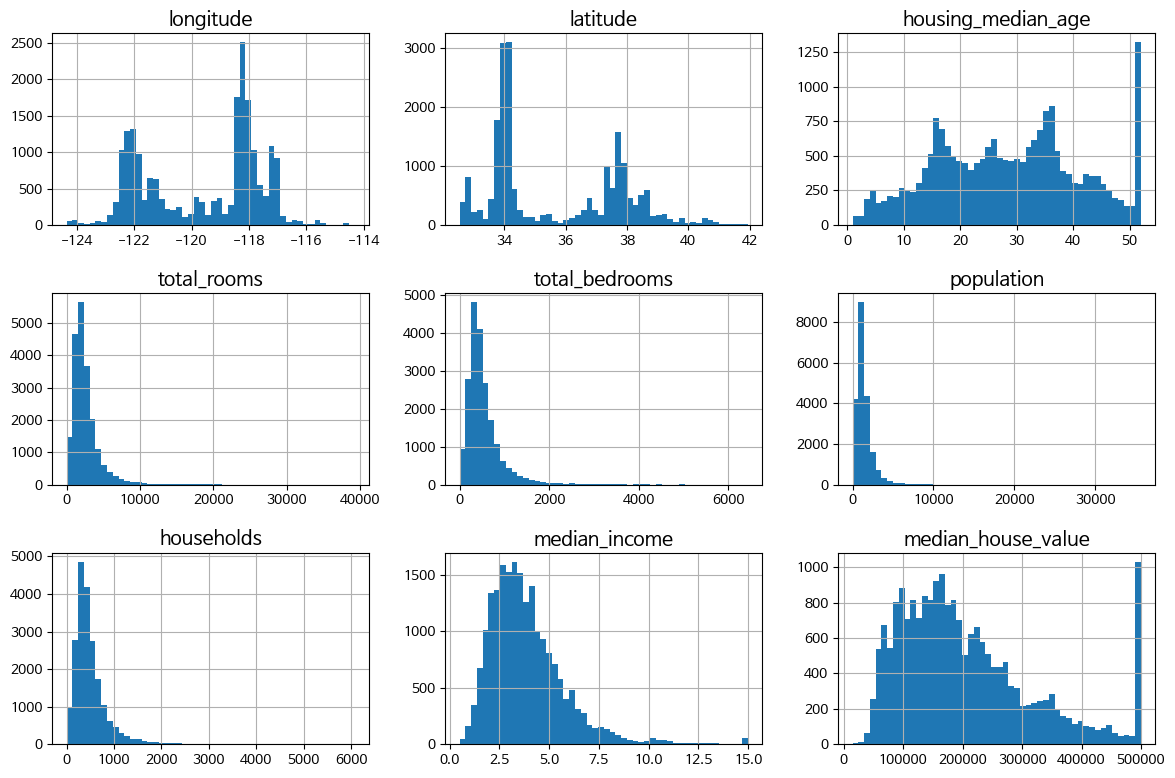

In [20]:
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14) # 기본 폰트 크기
plt.rc('axes', labelsize=14, titlesize=14) # 그래프 제목 및 x축 y축 레이블 크기
plt.rc('legend', fontsize=14) # 범례 (그래프에 표시된 선이나 점의 의미를 설명)의 폰트 크기
plt.rc('xtick', labelsize=10) # x축 눈금 크기
plt.rc('ytick', labelsize=10) # y축 눈금 크기

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

## 테스트 세트 만들기

In [21]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # np.random.permutation()은 int를 입력값으로 받을 시 해당 범위의 값까지의 값을 배열로 만들어 무작위로 섞어 반환하고 배열 입력 시 원래 배열의 시퀀스를 무작위로 섞어 반환
    shuffled_indices = np.random.permutation(len(data)) # 0부터 data의 길이만큼의 숫자 (인덱스) 즉, 0~len(data)를 무작위로 섞어서 리스트로 반환
    test_set_size = int(len(data) * test_ratio) # 입력받은 테스트 데이터셋 비율 만큼을 데이터의 총 길이에 곱해 테스트 셋의 크기 설정
    test_indices = shuffled_indices[:test_set_size] # 0~테스트셋의 크기-1까지의 값을 data의 인덱스가 랜덤으로 섞여있는 리스트에서 추출 -  test set 인덱스로 사용
    train_indices = shuffled_indices[test_set_size:] # 테스트셋의 크기~마지막까지의 값을 인덱스가 랜덤으로 섞여있는 리스트에서 추출 - train set 인덱스로 사용
    return data.iloc[train_indices], data.iloc[test_indices] # 추출한 인덱스 리스트를 토대로 실제 데이터에 적용해 train과 test 데이터셋 분할

In [22]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [23]:
len(test_set)

4128

노트북 실행 결과를 일정하게 유지하기 위해 랜덤 시드를 설정합니다:

In [24]:
# 위 함수를 실행할 때마다 다른 테스트 세트가 생성되고, 계속되다 보면 머신러닝 알고리즘이 전체 데이터셋을 점점 알아가게 되므로 이런 상황을 피해야함
# 첫 번째 해결책은 처음 실행에서 테스트 세트를 저장하고 다음 번 실행에도 저장했던 테스트 세트를 사용
# 두 번째 해결책은 np.random.permutation()을 호출하기 전에 np.random.seed(숫자)를 호출해 난수 발생기의 초깃값을 지정
# 위의 두 해법 모두 다음번 업데이트된 데이터셋을 사용할 때 문제가 됨 - 새로운 데이터들이 반영 X
# 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할 가능하게 하는 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것 (샘플이 고유하고 변경 불가능한 식별자를 가지고 있다고 가정)
np.random.seed(42)

하지만 여러 변동 요인으로 인해 노트북이 책에 실린 것과 완전히 똑같은 출력을 만든다고 보장하지 않습니다. 가장 중요한 요소는 라이브러리가 업데이트되면서 시간이 지나면서 알고리즘이 조금씩 바뀌는 것입니다. 따라서 약간의 차이는 이해해 주세요. 아마도 대부분의 출력은 동일하거나 적어도 같은 범주에 있을 겁니다.

Note: 또 다른 무작위성 요소는 파이썬 set의 순서입니다. 파이썬 시작시에 랜덤하게 시드가 부여되는 `hash()` 함수를 기반으로 합니다(DoS 공격을 막기 위해 파이썬 3.3부터 적용되었습니다). 이런 무작위성을 제거하려면 파이썬을 시작하기 _전에_ `PYTHONHASHSEED` 환경 변수를 `"0"`으로 설정합니다. 파이썬을 시작한 후에 이를 설정하면 아무런 효과가 없습니다. 다행히 코랩에서 노트북을 실행하면 이 변수가 항상 설정됩니다.

In [25]:
# CRC32는 데이터의 디지털 전송에 있는 오류를 확인하는 데 사용되는 순환 중복 검사라고도 하는 데이터의 체크섬
# crc32는 데이터를 해싱할 때 사용될 수 있음
from zlib import crc32

# 식별자와 테스트셋의 비율을 입력 받고 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%(test_ratio)보다 작거나 같은 샘플만 데이터 세트로 보낼 수 있게 하는 코드
# 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지됨
# 새로운 테스트 세트의 경우, 새 샘플의 20%를 갖게 되지만 이전에 있던 훈련 세트에 있던 샘플은 포함시키지 않음
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column] # 식별자 컬럼 추출
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio)) # 식별자 컬럼으로 테스트셋에 속하는지 여부 판단
    return data.loc[~in_test_set], data.loc[in_test_set] # train, test 데이터셋 순으로 반환, 테스트셋에 속하지 않는 건 data.loc[~in_test_set]

In [26]:
np.int64(housing['latitude'][0]) # 기존 latitude 속성의 0번 째 샘플의 정수 값은 37

37

In [27]:
crc32(np.int64(housing['latitude'][0]))# crc32() 메서드를 통해 해싱 시 다음과 같은 값으로 변환

3568612187

In [28]:
0.2*2**32 # 해시 최댓값의 20%

858993459.2

In [29]:
housing_with_id = housing.reset_index()  # `index` 열 추가된 새로운 데이터 프레임 변수 정의
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index") # 정의 해뒀던 함수 사용해서 데이터 스플릿

In [30]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
# 위처럼 행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야 함
# 새 데이터가 가장 마지막 인덱스를 가져가야 하고 중간에 인덱스가 사라질 시 연속성에 문제가 생김
# 이것이 불가능할 땐, 고유 식별자를 안전한 특성을 사용해 만들어야 함
# 예를 들어, 구역의 위도와 경도는 몇백 년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이 ID를 만들 수 있음
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [32]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [33]:
# 사이킷런은 데이터셋을 여러 subset으로 나누는 다양한 방법 제공
# 아래 train_test_split()은 앞서 정의한 shuffle_and_split_data() 함수와 아주 비슷하지만 두 가지 특징이 더 존재
# 첫 번째로 앞서 설명한 난수 초깃값을 설정할 수 있는 random_state 매개 변수가 있음
# 두 번째로 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 동일한 인덱스를 기반으로 나눌 수 있음
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [34]:
test_set[test_set["total_bedrooms"].isnull()==True]['total_bedrooms']

8198    NaN
11218   NaN
7434    NaN
12944   NaN
14615   NaN
14777   NaN
8379    NaN
5971    NaN
7901    NaN
327     NaN
11584   NaN
18217   NaN
5940    NaN
15109   NaN
17708   NaN
3111    NaN
4119    NaN
18241   NaN
3707    NaN
13498   NaN
13320   NaN
19038   NaN
14903   NaN
20325   NaN
4333    NaN
12882   NaN
1441    NaN
19405   NaN
2111    NaN
3926    NaN
6407    NaN
11020   NaN
4504    NaN
13093   NaN
12419   NaN
14727   NaN
19880   NaN
14360   NaN
9000    NaN
1891    NaN
7506    NaN
17065   NaN
13086   NaN
17292   NaN
Name: total_bedrooms, dtype: float64

In [35]:
len(test_set["total_bedrooms"].isnull()) # 테스트셋 샘플의 갯수

4128

In [36]:
test_set["total_bedrooms"].isnull().sum() # 테스트셋 샘플 중 침대 갯수가 NaN인 샘플의 갯수

44

<pre>
지금까지는 순수한 랜덤 샘플링 방식
데이터셋이 충분히 크다면 (특히, 특성 수에 비해) 일반적으로 괜찮지만 그렇지 않다면 샘플링 편향이 생길 가능성이 큼
설문 조사 기관에서 1000명에게 설문을 하려할 때, 1000명을 랜덤으로 뽑는 게 아님
묻고 싶은 설문에 대해 전체 인구를 대표할 수 있는 1000명을 뽑아야 함.
미국 인구의 51.1%가 여성이고 48.9%가 남성이라면, 잘 구성된 설문 조사는 샘플에서도 이 비율을 유지해야 함.
이를 <b>계층적 샘플링(stratified sampling)</b>이라고 함
전체 인구는 계층이라는 동질의 그룹으로 나뉨
테스트 세트가 전체 인구를 대표하도록 각 계층에서 올바른 샘플을 추출
</pre>

인구의 여성 비율이 51.1%일 때 1,000명으로 구성된 랜덤 샘플에서 여성이 48.5% 보다 작거나 53.3% 보다 많을 확률을 계산하려면 [이항 분포](https://en.wikipedia.org/wiki/Binomial_distribution)를 사용합니다. 이항 분포의 `cdf()` (cumulative distribution function) 메서드는 여성의 수가 주어진 값보다 작거나 같을 확률을 반환합니다.

In [37]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법
# 완전한 랜덤 샘플링을 사용하여 설문을 진행하면 48.5%보다 적거나 53.5%보다 많은 여성이 테스트 세트에 들어갈 확률이 약 10.7%

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511

# binom(sample_size, ratio_female)는 시행 횟수(sample_size)와 성공 확률(ratio_female)을 파라미터로 가지는 이항 분포 객체를 생성
# sample_size 횟수의 이항 시행에서 ratio_female의 확률로 성공할 때, 484회 이하로 성공할 확률을 계산하는 것입니다. - 485명 미만이 여자일 확률
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


수학 대신 시물레이션을 해도 거의 동일한 결과를 얻을 수 있습니다:

In [38]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

# 이 코드 라인은 넘파이(numpy)를 사용하여 시뮬레이션을 수행하는 것.
# 넘파이는 파이썬에서 강력한 수치 계산을 위한 라이브러리로, 대규모의 다차원 배열과 행렬 연산에 주로 사용.
# 여기서는 난수를 생성하고 이항 분포를 시뮬레이션하는 데 사용

# random seed 부여 후 np.random.rand(100_000, sample_size)는 0과 1 사이의 균일 분포(uniform distribution)에서 난수를 생성하여 100,000개의 행과 sample_size개의 열을 가진 2차원 배열을 만듦
# 여기서 각 요소는 성공 확률(ratio_female)과 비교될 예정
# < ratio_female는 생성된 각 난수가 ratio_female보다 작은지 여부를 확인하는 부울 연산입니다. ratio_female이 0과 1 사이의 값이라고 가정할 때, 이 연산은 베르누이 시행에서 '성공' 여부를 나타내는 것으로 해석
#  즉, 난수가 ratio_female보다 작으면 성공으로 간주하여 True(값으로는 1)를 반환하고, 그렇지 않으면 실패로 간주하여 False(값으로는 0)를 반환.
# sum(axis=1)은 위에서 생성된 부울 배열의 각 행에 대해 합을 구하는데, 이는 각 시행에서의 '성공' 횟수를 합산
# axis=1은 열을 따라 합을 구하라는 것을 의미하며, 즉 각 행(개별 시뮬레이션)에 대한 성공 횟수의 총합을 계산

# 종합하자면, 이 코드는 sample_size의 시행을 100_000번 반복하면서 ratio_female의 확률로 '성공'하는 시행의 수를 각각 세어서 samples 배열에 저장
# 결과적으로 samples 배열에는 각 시행에서 '여성'이라고 가정한 성공 사례의 수가 100,000개의 요소로 구성
# 이를 통해 ratio_female의 비율로 성공한 시행의 분포를 시뮬레이션하여 분석할 수 있음

# np.random.rand() 함수에 의해 생성된 난수가 ratio_female의 값보다 작을 확률은 ratio_female의 값 자체임
# 왜냐하면 0과 1 사이의 균일 분포에서 어떤 특정 값 x가 나올 확률은 x와 같음
# 예를 들어, ratio_female이 0.3이라면, 각 시행에서 여성이 선택될 확률이 30%임을 의미
# p.random.rand()에 의해 생성된 난수가 0과 0.3 사이에 있을 확률은 30%임
# 마찬가지로, 난수가 0.3과 1 사이에 있을 확률은 70%임

# 정리하자면 각 행당 1000개의 컬럼의 값 각각을 ratio_female (여기선 0.511)의 값과 비교해서 ratio_female보다 작으면 성공 (0과 1 사이에서 0.511 이하의 값이 나올 확률은 51.1%임 즉, 0과 0.511사이의 값이 나오면 51.1%의 범주에 들었다고 이해) , 크면 실패
# 각 행의 컬럼 값들의 성공 횟수(생성된 난수 값이 0.511보다 작거나 같은 컬럼의 갯수)가 sum에 의해 더해지고 samples에 하나의 행으로 반환
# 위의 과정이 총 행의 갯수인 100000만큼 실행돼서 samples에 하나의 행렬로 저장
samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1) # 위 블록에서 정의했듯이 sample_size == 1000


# samples < 485 또는 samples > 535: 각 시뮬레이션의 결과(samples)가 485 미만 또는 535 초과인지를 평가합니다.
# 이는 양측 꼬리 검정(two-tailed test)의 일부로, 기대되는 범위를 벗어나는 결과를 찾습니다.
# mean(): 부울 배열에서 True 값의 평균을 계산합니다. 이것은 부울 값 True가 1로, False가 0으로 간주될 때 True 값의 비율을 나타냅니다.
# 다시 말해, 100,000번의 시뮬레이션 중에서 기대되는 범위(485 ~ 535)를 벗어난 시뮬레이션의 비율을 계산하는 것입니다.

# 조건 충족 비율 계산: 부울 배열에서 True의 평균을 구하면, 전체 시뮬레이션 중 조건을 만족하는 시뮬레이션의 비율을 알 수 있음
# 각 시뮬레이션에서 True는 1로, False는 0으로 취급되므로, 전체 배열의 평균은 사실상 True의 비율, 즉 조건을 만족하는 시뮬레이션의 비율을 나타냄

# 1000번의 시행을 100,000번 반복 시뮬레이션
# 예를 들어, 100,000번의 시뮬레이션 중 10,000번이 조건 (samples < 485) | (samples > 535)을 만족한다면, 부울 배열에는 10,000개의 True 값(1)과 90,000개의 False 값(0)이 있을 것임
# 이 배열의 평균은 10,000 * 1 + 90,000 * 0를 전체 개수인 100,000으로 나눈 값, 즉 0.1이 됩니다. 이는 조건을 만족하는 비율이 10%임을 의미
((samples < 485) | (samples > 535)).mean()

0.1071

In [39]:
samples

array([515, 491, 511, ..., 522, 483, 496])

- 전문가가 중간 소득이 중간 주택 가격을 예측하는데 매우 중요하다고 얘기했다고 가정 (전체 데이터셋을 대표하는 기준이 중간 소득)
- 소득 카테고리를 기준으로 <b>계층적 샘플링</b>을 하는 게 바람직
- 테스트 세트가 전체 데이터셋에 있는 여러 <b>소득 카테고리</b>를 잘 대표해야 함
- 중간 소득이 <b>연속적인 숫자형 특성이므로 계층적 샘플링을 위해 소득에 대한 카테고리 특성을 만들어야 함</b>
- 위의 중간 소득 히스토그램을 보면 중간 소득 대부분이 1.5에서 6사이에 모여있고, 일부는 6을 넘김
- 계층별로 데이터셋에 충분한 샘플 수가 있어야 함. 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생
- 즉, 너무 많은 계층으로 나누어서는 안 되며, 각 계층이 충분히 커야 함

In [40]:
# pd.cut() 함수를 사용해 카테고리 5개를 가진 소득 카테고리 특성을 만듦
# 레이블 1은 0에서 1.5까지 범위이고, 레이블 2는 1.5에서 3까지의 범위, ...
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [41]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [42]:
housing["income_cat"].value_counts().sort_index() #  카테고리 정렬 후 조회

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

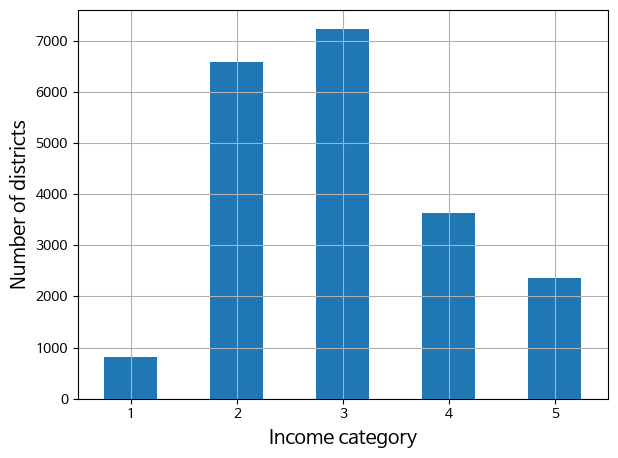

In [43]:
# 레이블 순으로 정렬해서 bar plot 생성 (히스토그램 생성, rot은 x축 라벨의 회전 정도)
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts") # 지구 수
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

- 이제 소득 카테고리를 기반으로 계층적 샘플링을 수행
- 사이킷런은 sklearn.model_selection 패키지 안에 여러 가지 splitter(분할기) 클래스를 제공
- 분할기는 데이터셋을 훈련 세트와 테스트 세트로 분할하는 다양한 전략을 구현한 것
- 모든 분할기는 훈련과 테스트 분할에 대한 반복자(iterable object?)를 반환하는 split() 메서드를 가지고 있음
- 정확히 말하면 split() 메서드는 훈련과 테스트 데이터 자체가 아니라 인덱스를 반환
- 뒷 부분 교차 검증 파트에서 보겠지만 여러 개로 분할하면 모델의 성능을 더 잘 추정할 수 있음
- 다음 코드는 한 데이터셋으로 각각 다른 10개의 계층 분할을 생성

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit 인스턴스를 생성
# 여기서 n_splits=10은 10개의 훈련/테스트 세트 쌍을 생성을, test_size=0.2는 각 테스트 세트가 전체 데이터의 20%를 차지할 것을 뜻함
# random_state=42는 결과의 재현가능성을 위해 난수 생성기의 시드를 고정한다는 것을 나타냄
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# 분할된 훈련/테스트 세트를 저장할 빈 리스트를 초기화
strat_splits = []

# splitter의 split 메서드를 호출하여 데이터 세트 housing을 여러 훈련/테스트 세트로 분할. split 메서드는 두 개의 인자를 받음
# 첫 번째 인자는 분할하고자 하는 특성을 가진 데이터 세트이며, 두 번째 인자는 계층화에 사용할 클래스 레이블
# 위에서 말한 것처럼 split() 메서드는 훈련과 테스트 데이터 자체가 아닌 그 인덱스를 반환하므로 _index 변수에 할당해서 사용 가능
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index] #iloc을 이용하여 생성된 훈련 세트의 인덱스에 해당하는 데이터를 housing 데이터 프레임에서 선택
    strat_test_set_n = housing.iloc[test_index] # iloc을 이용하여 생성된 테스트 세트의 인덱스에 해당하는 데이터를 housing 데이터 프레임에서 선택
    strat_splits.append([strat_train_set_n, strat_test_set_n]) # 각각의 훈련 세트와 테스트 세트를 포함하는 리스트를 strat_splits 리스트에 추가
    # strat_splits 리스트는 10개의 원소를 갖게 되며, 각 원소는 하나의 훈련 세트와 테스트 세트 쌍을 포함

In [45]:
strat_train_set, strat_test_set = strat_splits[0] # 첫 번째 분할된 훈련 및 테스트 세트만 사용

In [46]:
strat_splits[0][0] # 분할된 훈련 및 테스트 리스트에서 첫 번째 train set
strat_splits[0][1] # 분할된 훈련 및 테스트 리스트에서 첫 번째 test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


하나의 계층적 분할을 얻기 위해서는 train_test_split() 함수와 stratify 매개변수를 사용하여 만드는 것이 훨씬 간단합니다:

In [47]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [48]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) # 테스트 세트에서 소득 카테고리(income_cat)의 비율

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [49]:
# 추가 코드 – 그림 2–10를 생성합니다.
# 계층 샘플링과 순수한 랜덤 샘플링의 샘플링 편향 비교
# 샘플링 오차 % = ((샘플링된 세트의 비율/전체 세트의 비율) −1)×100
# 이 공식에서 -1을 하는 이유는 계층 샘플링이나 랜덤 샘플링으로 생성된 테스트 세트의 비율이 전체 데이터 세트의 비율과 정확히 일치할 경우 오차가 0%가 되어야 하기 때문
# 만약 샘플링된 세트의 비율이 전체 세트의 비율보다 높다면, 계산 결과는 양수가 될 것이고, 샘플링된 세트의 비율이 전체 세트의 비율보다 낮다면 계산 결과는 음수가 됨

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체 %": income_cat_proportions(housing),
    "계층 샘플링 %": income_cat_proportions(strat_test_set),
    "랜덤 샘플링 %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "소득 카테고리"
compare_props["계층 샘플링 오차 %"] = (compare_props["계층 샘플링 %"] /
                                   compare_props["전체 %"] - 1)
compare_props["랜덤 샘플링 오차 %"] = (compare_props["랜덤 샘플링 %"] /
                                  compare_props["전체 %"] - 1)
(compare_props * 100).round(2)

,전체 %,계층 샘플링 %,랜덤 샘플링 %,계층 샘플링 오차 %,랜덤 샘플링 오차 %
소득 카테고리,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


- 아래 예제에서는 income_cat 특성을 다시 사용하지 않으므로 이 열을 삭제하고 데이터를 원래 상태로 되돌림


In [50]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) # inplace = True를 통해 호출된 객체에 새로운 데이터프레임 재할당하고 아무런 값도 반환 X

# 데이터 이해를 위한 탐색과 시각화

In [51]:
# 데이터 이해를 위해 테스트 세트를 떼어놓고 훈련 세트에 대해 탐색
# 훈련 세트의 크기가 작으므로 전체를 사용
# 전체 훈련 세트에 다양한 변환을 실험하기 때문에 나중에 되돌릴 수 있도록 원본 데이터의 복사본을 만듦
housing = strat_train_set.copy()

## 지리적 데이터 시각화

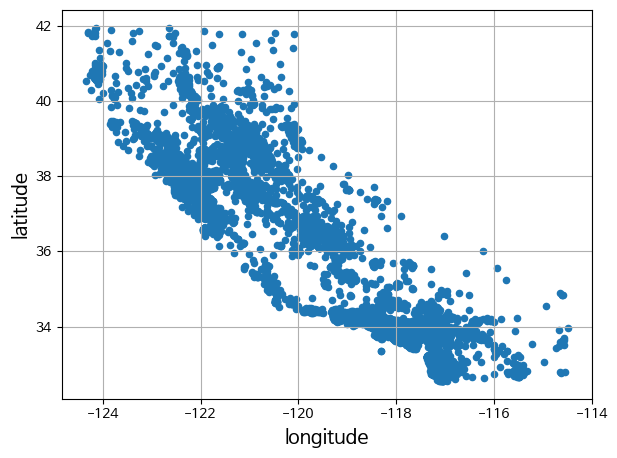

In [52]:
# 이 데이터셋에는 지리 정보(위도와 경도)가 포함되어 있으니 모든 구역을 산점도로 만들어 데이터를 시각화하면 좋음
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

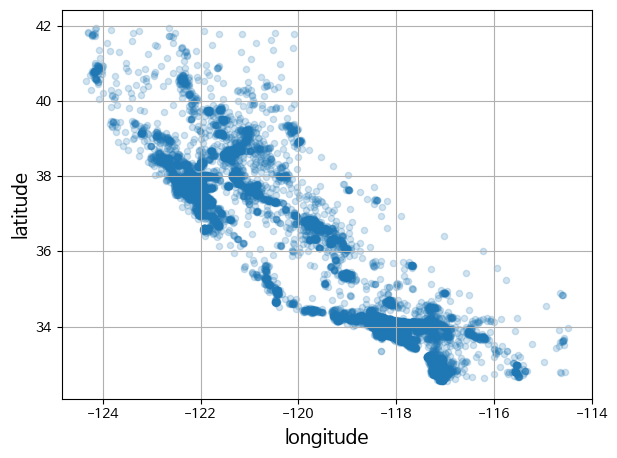

In [53]:
# 위 그림은 캘리포니아 지역을 잘 나타내지만 특별한 패턴을 찾기는 힘듦
# alpha 옵션을 0.2로 주면 데이터 포인트가 밀집된 영역을 잘 보여줌
# alpha 매개변수는 matplotlib 플롯에서 포인트의 투명도를 설정하는 데 사용. alpha 값은 0(완전 투명)에서 1(완전 불투명) 사이의 값을 가질 수 있음
# alpha=0.2로 설정하는 경우, 각 포인트는 20%의 불투명도(또는 80%의 투명도)를 갖게 됨
# alpha 값을 낮게 설정하면, 다른 지역에 비해 특정 지역에 포인트들이 밀집되어 있는 것을 더 명확하게 볼 수 있음
# 인구밀도나 특정 조건을 만족하는 지점들의 분포를 나타낼 때 유용

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

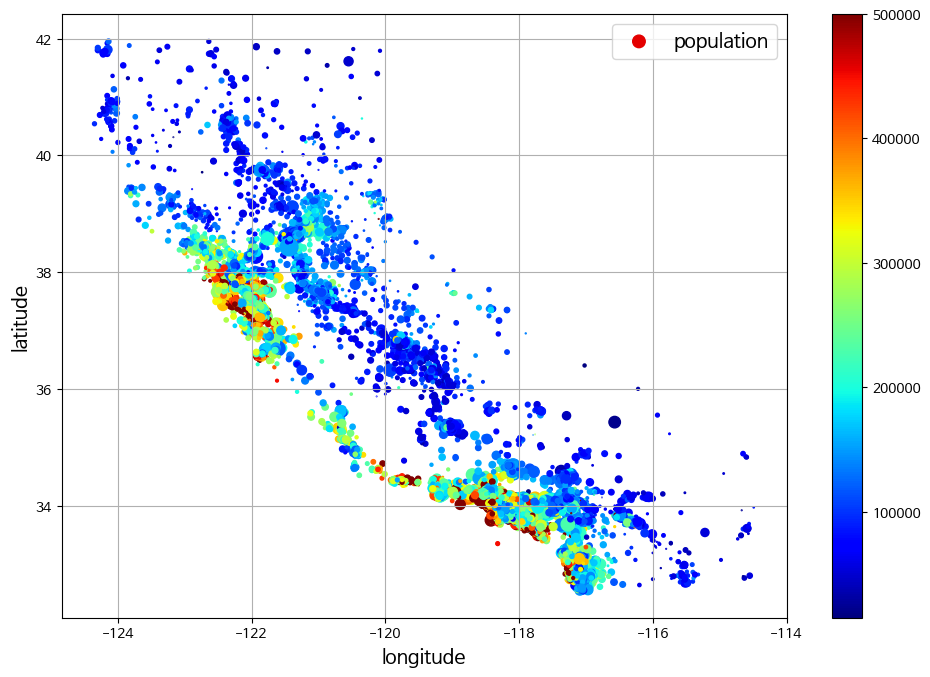

In [54]:
# 주택 가격을 나타내는 플롯
# 원의 반지름은 구역의 인구를 나타냄 (매개변수 s: size?)
# 색상은 가격을 나타냄 (매개변수 c: color)
# 미리 정의된 컬러 맵 중 파란색(낮은 가격)에서 빨간색(높은 가격)까지의 범위를 가지는 jet를 사용 (매개 변수 cmap)
# 아래 그림에서 주택 가격이 지역(바다 근접 지역) 및 인구 밀도와 관련성이 높음을 알 수 있음
# 군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있음
# 해안 근접성 특성이 유용할 수도 있지만 북부 캘리포니아 지역(위도 35도 이상 지역)의 해안가는 주택 가격이 그리 높지 않으므로 간단한 규칙 적용은 어려움
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c=housing["median_house_value"], cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

`sharex=False` 매개변수는 x-축의 값과 범례를 표시하지 못하는 버그를 수정합니다. 이는 임시 방편입니다(https://github.com/pandas-dev/pandas/issues/10611 참조).

다음 셀은 이 장에 있는 첫 번째 그림을 생성합니다(이 코드는 책이 없습니다). 이 그림은 배경에 캘리포니아 이미지를 넣고, 레이블 이름을 바꾸고, 그리드를 삭제하여 이전 그림을 더 멋있게 만든 것입니다.

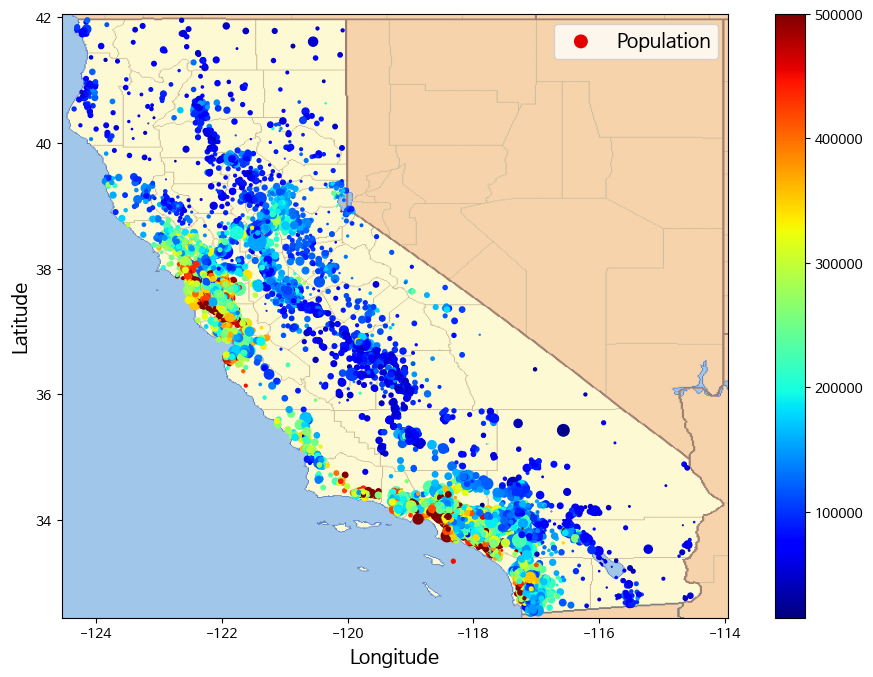

In [55]:
# 추가 코드 – 이 셀은 이 장의 첫 번째 그림을 생성합니다

#  캘리포니아 이미지를 다운로드합니다
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c=housing_renamed["Median house value (ᴜsᴅ)"], cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

## 상관관계 조사

### 방법 1

In [56]:
# 판다스 1.5버전부터 수치형 데이터만 포함하는지 여부를 결정하는 `numeric_only` 매개변수가 추가되었습니다.
# 이 매개변수의 기본값은 `True`입니다.
# 판다스 2.0버전에서 기본값이 `False`로 바뀌므로 명시적으로 `numeric_only=True`로 지정합니다.
# 데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수(standard correlation coefficient)를 corr()메서드를 이용해 쉽게 계산
corr_matrix = housing.corr(numeric_only=True)

In [57]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [58]:
# 상관관계의 범위는 -1부터 1까지임
# 계수가 1에 가까우면 강한 양의 상관관계를 가짐
# median_house_value(중간 주택 가격)는 median_income(중간 소득)이 올라갈 때 증가하는 경향이 있음
# 계수가 -1에 가까우면 강한 음의 상관관계를 가짐
# latitude(위도)와 median_house_value(중간 주택 가격)에는 약한 음의 상관관계를 볼 수 있음. 즉, 북쪽으로 갈수록 주택 가격이 조금씩 내려가는 경향이 있음.
# 계수가 0에 가까우면 선형적인 상관관계가 없다는 뜻
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

### 방법 2

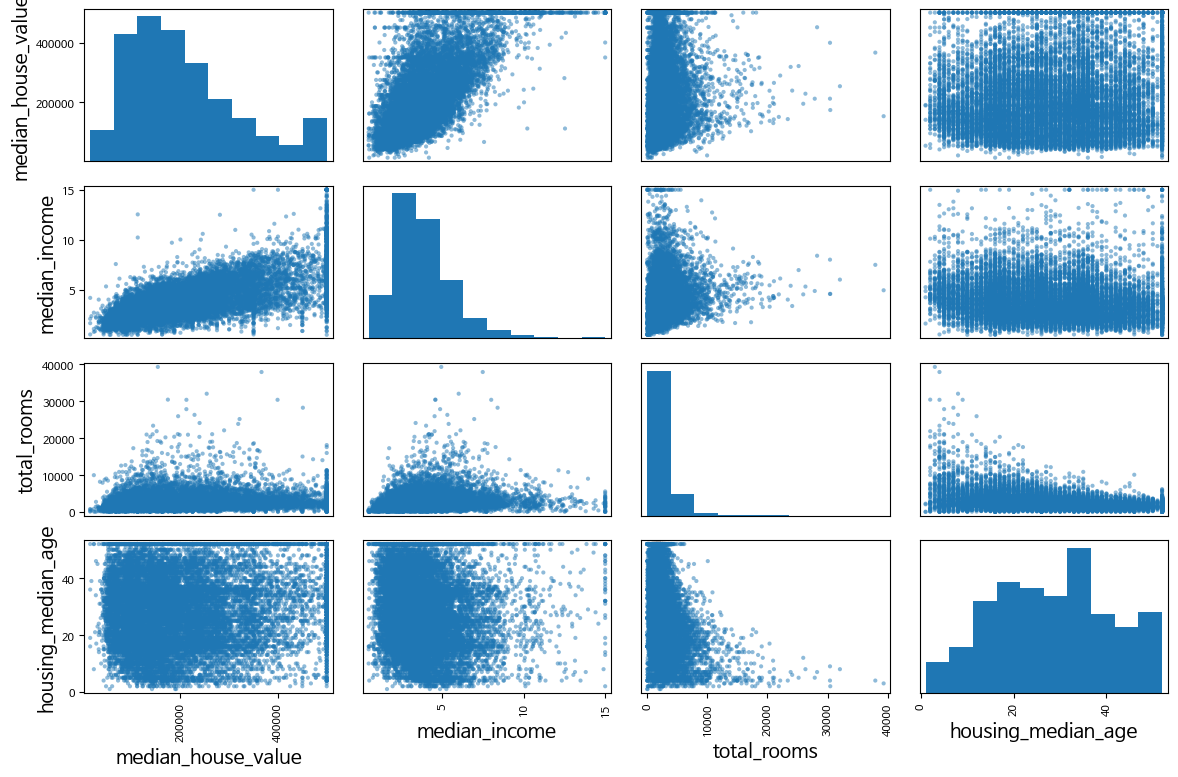

In [59]:
# 특성 사이 상관관계를 확인하는 다른 방법은 판다스의 scatter_matrix (숫자형 특성 간 산점도를 그려보는 것)
# 여기선 숫자형 특성이 11개이므로 11**2 == 121개의 그래프가 그려짐
# 한 번에 나타내기 어려우므로 중간 주택 가격과 상관관계가 높아 보이는 특성 몇 개만 띄우기
# 산점도 행렬(scatter_matrix)은 수치형 특성(numeric feature)간의 산점도와 각 수치형 특성의 히스토그램(대각선 방향)을 출력 -> 히스토그램의 경우 다른 옵션으로도 사용 가능

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # 추가 코드
plt.show()

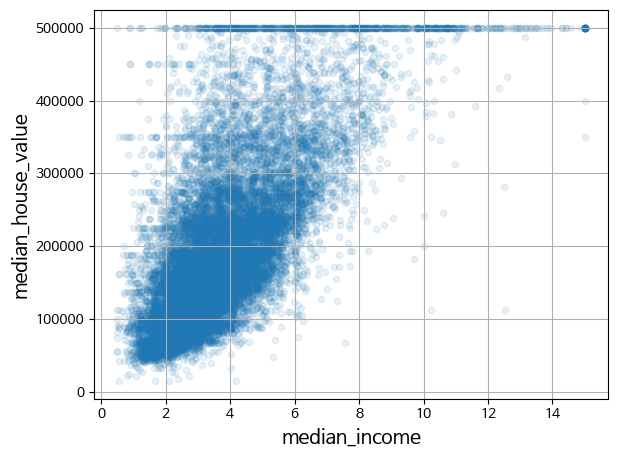

In [60]:
# 위의 산점도 행렬을 보면 median_house_value(중간 주택 가격)을 예측하는 데 median_income(중간 소득)이 가장 유용해 보임 -> 발췌해서 보기
# 사실 1: 상관관계가 매우 강함, 위쪽으로 향하는 경향을 볼 수 있으며 포인트들이 너무 많이 퍼져 있지 않음
# 사실 2: 앞서 본 가격의 한계값이 $500,000에서 수평선으로 잘 보임. 이 외에도 $450,000, $350,000, $280,000, 등의 지점에서도 수평선이 보임. 이 경우, 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역 제거가 가능.
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # e추가 코드
plt.show()

- 지금까지 데이터를 탐색하고 인사이트를 얻는 여러 방법(통계, 샘플링, 상관관계, 시각화 등)에 대해 다룸.
- 머신러닝 알고리즘에 주입하기 전 정제해야 할 이상한 데이터를 확인했고, 특성 사이의 흥미로운 상관관계도 발견 (특히, 타깃과의 상관관계)
- 어떤 특성의 분포는 꼬리가 길어 데이터를 변형하는 것이 좋을 수도 있음. (로그 함수 or 제곱근)
- 머신러닝 알고리즘용 데이터를 준비하기 전 마지막으로 할 수 있는 일은 특성을 여러가지로 조합해보는 것임. 아래에서 계속 진행.

## 특성 조합으로 실험

In [61]:
# 기존의 특성들의 조합으로 더 유용한 특성 생성
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] # 가구(households) 당 방 개수
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] # 전체 방 대비 침실 비율
housing["people_per_house"] = housing["population"] / housing["households"]

In [62]:
# 특성 조합 후 상관관계 행렬 분석
# 새로운 bedrooms_ratio 특성은 전체 방 개수나 침실 개수보다 중간 주택 가격과의 상관관계가 훨씬 높음
# 실제로 침실/방의 비율이 낮은 집이 더 비싼 경향이 있음
# 가구 당 방 개수도 구역 내 전체 방 개수보다 유용
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

#### - 이 탐색 단계는 완벽하지 않음. 빠르게 시작해서 인사이트를 얻는 것이 합리적인 첫 번째 프로토타입을 만드는데 도움이 될 것임.
#### - 다만, 이는 <b>반복적인 과정</b>으로 <b>프로토타입을 만들고 실행한 후 그 결과를 분석해서 더 많은 인사이트를 얻고 다시 이 탐색 단계로 돌아와 반복 수행.</b>


# 머신러닝 알고리즘을 위한 데이터 준비

#### 이 작업을 수동으로 하는 대신 함수를 만들어 자동화 해야하는 이유

- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있음. (다음 번에 새로운 데이터셋을 사용할 때 활용 가능)
- 향후 프로젝트에 재사용 가능한 변환 라이브러리를 점진적으로 구축 가능.
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 이 함수를 사용해 변환할 수 있음.
- 여러 가지 데이터 변환을 쉽게 시도해 볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편리.

원본 훈련 세트로 복원하고 타깃을 분리합니다(`strat_train_set.drop()`은 지정한 열을 제외한 `strat_train_set`의 복사본을 만듭니다. `inplace=True`로 지정하지 않은 한 `strat_train_set` 자체를 수정하지 않습니다).

In [63]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 정제: 누락된 특성 다루기

책에 소개된 세 개의 옵션은 다음과 같습니다:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # 옵션 1

housing.drop("total_bedrooms", axis=1)                     # 옵션 2

median = housing["total_bedrooms"].median()                # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
```
옵션 1: 해당 구역 제거, 옵션 2: 전체 특성 제거, 옵션 3: 누락된 값을 특정 값으로 채움

각 옵션에 대해 `housing`을 오염시키지 않기 위해 복사본을 만들어 사용합니다. 각 옵션의 출력을 확인하지만 NaN 값을 담고 있는 행은 필터링하겠습니다.

In [64]:
# any() 메소드는 지정된 축을 따라 하나 이상의 True 값이 있는지 확인합니다. 여기서 axis=1은 메서드가 행을 따라 작동해야 함을 지정합니다.
# 따라서 housing DataFrame의 각 행에 대해 .any(axis=1)은 해당 행의 셀이 NaN인 경우 True를 반환하고 그렇지 않으면 False를 반환합니다.

null_rows_idx = housing.isnull().any(axis=1) # True/False로 채워진 Series 형태
housing.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [65]:
null_rows_idx

13096    False
14973    False
3785     False
14689    False
20507    False
         ...  
14207    False
13105    False
19301    False
19121    False
19888    False
Length: 16512, dtype: bool

In [66]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1: 해당 특성의 NaN 구역 제거

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [67]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2: 전체 특성 삭제

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [68]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3: 누락된 값을 어떤 값(0, 평균, 중간값 등)으로 대체

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [69]:
# 옵션 3이 데이터를 최대한 유지하므로 이를 선택, 사이킷런에서 제공하는 SimpleImputer 클래스를 사용해 더 쉽게 옵션 3를 구현 가능
# 이 클래스는 각 특성의 중간값을 저장하고 있어 유용 - 훈련, 검증, 테스트 세트뿐 아니라 모델에 주입될 새로운 데이터에 있는 누락값도 대체 가능
# strategy 매개변수에 "median"을 입력해 객체 생성 - 중간값을 이용한 누락값 대체
# strategy = "most_frequent" -> 최빈값으로 대체, strategy = "constant" or fill_value = ... -> 상수로 대체
# sklearn.impute 패키지는 누락된 값을 대체하기 위한 (수치 특성에만 적용되는) 더 강력한 클래스도 제공
# KNNImputer: 누락된 값을 이 특성에 대한 k-최근접 이웃의 평균으로 대체. 거리는 모든 특성을 바탕으로 계산
# IterativeImputer: 특성마다 회귀 모델을 훈련하여 다른 모든 특성을 기반으로 누락된 값을 예측. 그 다음 업데이트된 데이터로 모델을 다시 훈련하고 이 과정을 몇 번 반복하여 모델과 대체 값을 향상
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

`"median"` 전략을 사용하기 위해 수치 특성을 분리합니다(`ocean_proximity` 같은 텍스트 특성에서는 계산할 수 없습니다):

In [70]:
# 중간값은 수치형 특성에서만 계산될 수 있기 때문에 수치 특성만 가진 데이터 복사본을 생성
# 아래 코드로 텍스트 특성인 ocean_proximity가 제외됨
housing_num = housing.select_dtypes(include=[np.number])

In [71]:
# fit() 메서드를 사용해 훈련 데이터에 적용
# imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장
# 현재는 total_bedrooms 특성에만 누락된 값이 있지만 나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확신할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직함
imputer.fit(housing_num)

SimpleImputer(strategy='median')

## 사이킷런 API 설계 철학 (필히 읽기)

1. 일관성
- 모든 객체는 일관되고 단순한 인터페이스를 공유
2. 추정기 (estimator)
- 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체 ex) Imputer 객체
- 추정은 fit() 메서드에 의해 수행, fit()은 하나의 매개변수를 가지고 해당 매개변수는 데이터셋 (지도학습 알고리즘의 경우 독립변수와 종속변수 두 개의 매개변수로 이루어짐)
- 추정 과정에서 필요한 매개변수들(모델 파라미터들을 추정하기 위해 필요한 매개변수)은 하이퍼파라미터로 간주되고(ex -> Imputer 객체의 strategy 매개변수), 인스턴스 변수(각 객체가 독립적으로 가지고 있는 변수)로 저장되며 보통 생성자의 매개변수로 전달됨(__init__이나 __new__와 같이 새로운 객체가 생성될 때 호출되는 생성자에 전달)
3. 변환기 (transformer)
- (Imputer 같이) 데이터를 변환하는 추정기를 변환기라고 함.
- 변환은 데이터셋을 매개변수로 전달받은 transform() 메서드가 수행하고 변환된 데이터셋을 반환
- 이런 변환은 일반적으로 Imputer의 경우와 같이 학습된 모델 파라미터에 의해 결정
- 모든 변환기는 fit()과 transform()을 연달아 호출하는 것과 동일한 fit_transform() 메서드를 가지고 있음 (fit_transform() 메서드가 최적화되어 있어 더 빠른 경우가 이따금 존재)
4. 예측기
- 일부 추정기는 주어진 데이터셋에 대한 예측을 만들 수 있음 - ex) LinearRegression
- 예측기의 predict() 메서드는 새로운 데이터셋을 받아 이에 상응하는 예측값을 반환
- 테스트 세트를 사용해 예측의 품질을 측정하는 score() 메서드를 가짐
5. 검사 가능
- 모든 추정기의 하이퍼파라미터는 public 인스턴스 변수로 직접 접근할 수 있고 (ex -> imputer.strategy), 모든 추정기의 학습된 모델 파라미터도 접미사로 밑줄을 붙여서 공개 인스턴스 변수로 제공됨 (ex -> imputer.statistics_)
6. 클래스 남용 방지
- 데이터셋을 별도의 클래스가 아니라 넘파이 배열이나 사이파이(SciPy) 희소 행렬(sparse matrix)로 표현
7. 조합성
- 기존의 구성 요소를 최대한 재사용함
- 여러 변환기를 연결한 다음 마지막에 추정기 하나를 배치한 Pipelien 추정기를 쉽게 만들 수 있음
8. 합리적인 기본값
- 사이킷런은 일단 돌아가는 기본 시스템을 빠르게 만들 수 있도록 대부분의 매개변수에 합리적인 기본값을 지정


In [72]:
imputer.statistics_ # imputers가 계산한 중간값 - 밑줄 접미사를 통해 학습된 모델 파라미터 값 조회

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

각 특성의 중간 값을 수동으로 계산한 것과 같은지 확인해 보세요:

In [73]:
housing_num.median().values # median() 메서드를 이용한 중간값

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

훈련 세트를 변환합니다:

In [74]:
X = imputer.transform(housing_num) # 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있음

In [75]:
imputer.feature_names_in_ # imputer가 학습할 때 사용한 feature 명들

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

- 사이킷런 변환기는 판다스 데이터프레임이 입력되더라도 넘파이 배열(또는 이따금 사이파이 희소 행렬)을 출력함
- imputer.transform(housing_num)의 출력은 넘파이 배열임
- X에는 열 이름도 없고 인덱스도 없지만 housing_num으로부터 열 이름과 인덱스를 추출한 후 데이터프레임으로 감싸 복원 가능

In [76]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [77]:
# housing_tr로부터 이전에 total_bedrooms 특성의 값이 null이었던 인덱스 조회
# Imputer를 통해 median값으로 NaN 값들이 대체되어 있음
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [78]:
imputer.strategy

'median'

In [79]:
#from sklearn import set_config
#
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

이상치를 삭제합니다:

In [80]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [81]:
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

이상치를 삭제하고 싶다면 다음 코드를 실행하세요(전반적인 그래프나 수치값이 책과 달라짐):

In [82]:
# housing = housing.iloc[outlier_pred == 1]
# housing_labels = housing_labels.iloc[outlier_pred == 1]

## 텍스트와 범주형 특성 다루기

이제 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

In [83]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8) # ocean_proximity 특성에서 8개의 샘플값 확인

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [84]:
# 대부분의 머신러닝 알고리즘은 숫자를 다루므로 카테고리를 텍스트에서 숫자로 변환 - 사이킷런의 OrdinalEncoder 클래스 사용
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [85]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [86]:
# categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있음
# 범주형 특성마다 1D 카테고리 배열을 담은 리스트가 반환, 지금은 하나의 카테고리만 있으므로 배열 하나를 담은 리스트가 반환
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
# ordinal_encoder의 경우, 머신러닝 알고리즘이 가까이 있는 두 값을 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점
# 순서가 있는 카테고리의 경우 괜찮으나, 'ocean_proximity' 열은 해당되지 X -> 이 때에는 카테고리별 이진 특성을 원-핫 인코딩 방식을 통해 해결
# 해당 특성의 카테고리 개수에 맞게 dummy 특성을 생성해 해당되는 특성의 경우 값이 1 아닐경우 0
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [88]:
# 기본적으로 OneHotEncoder의 출력은 넘파이 배열이 아닌 사이파이 희소행렬
# 희소행렬은 0이 대부분인 행렬을 매우 효율적으로 표현 -> 0이 아닌 값과 위치를 저장
# 하나의 범주형 특성에 수백, 수천 개의 카테고리가 있을 경우 행마다 하나만 1이고 나머지는 0인 매우 큰 행렬을 만듦 -> 이 때, 희소행렬이 많은 메모리를 절약하고 계산속도를 높여줌
# 대부분의 희소행렬을 보통의 2D 배열처럼 사용할 수 있지만, (밀집된) 넘파이 배열로 바꾸려면 toarray() 메서드가 필요
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`OneHotEncoder`는 기본적으로 희소 행렬을 반환합니다. 필요하면 `toarray()` 메서드를 사용해 밀집 배열로 변환할 수 있습니다:

In [89]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

또는 `OneHotEncoder`를 만들 때 `sparse=False`로 지정할 수 있습니다:

In [90]:
# 사이킷런 1.2버전에서 `sparse_output` 매개변수가 추가되었고 `sparse` 매개변수는 1.4버전에서 삭제됩니다.
# 이에 대한 경고를 피하려면 `sparse_output`을 사용하세요.
# sparse_output=False로 지정 시, transform() 메서드가 일반적인 넘파이 배열을 반환
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [91]:
# 인스턴스 변수를 통한 카테고리 리스트 얻기
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [92]:
# 위와 같은 데이터 프레임을 생성 후 get_dummies('데이터프레임 이름') 메서드를 사용해 범주형 특성의 카테고리들을 특성화하고 값을 1과 0으로 채울 수 있음
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [93]:
# 원-핫 인코더와 get_dummies의 차이점:
# get_dummies는 두 개의 카테고리만 보았기 때문에 두 개의 열만 출력
# 원-핫 인코더는 학습된 카테고리마다 하나의 열을 순서대로 출력
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [94]:
# 또한, 알 수 없는 카테고리 '<2H OCEAN'를 담은 데이터프레임을 get_dummies()에 주입하면 문제가 없이 변환된 결과를 출력
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [95]:
# 원-핫 인코더의 경우 알 수 없는 카테고리를 감지하고 예외를 발생시킴 -> handle_unknown 매개변수를 "ignore"로 지정하여 알 수 없는 카테고리를 0으로 나타낼 수도 잇음
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [96]:
# 데이터프레임을 사용하여 사이킷런 추정기를 훈련할 때 추정기는 열 이름을 feature_names_in_ 속성에 저장
# 그 다음 사이킷런은 (transform()이나 predict()를 통해) 이 추정기에 입력된 모든 데이터프레임이 동일한 열 이름을 갖는지 확인함
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [97]:
# 변환기는 출력으로 데이터프레임을 만들 수 있도록 get_feature_names_out() 메서드도 제공
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [98]:
# pd.DataFrame()의 매개변수에
# 1) 학습된 원-핫 인코더로 변환된 데이터셋, 2) 컬럼명 지정을 위한 원-핫 인코더 학습 시 사용된 특성들, 3) 인덱스 지정을 위한 변환 전 데이터 셋의 인덱스를 전달
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [99]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## 특성 스케일링

In [100]:
#  min-max 스케일링(정규화)은 가장 간단한 방법 -> 각 특성에 대해 0~1 범위에 들도록 값을 이동하고 스케일을 조정: (데이터-최솟값)/(최댓값-최솟값)
#  사이킷런은 위 역할을 수행하는 MinMaxScaler 변환기를 제공하고 feature_range 매개변수로 0~1이 아닌 다른 범위를 설정 가능
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # 신경망은 평균이 0인 데이터에서 잘 작동하므로 -1~1 사이 범위가 선호됨
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [101]:
# 표준화의 경우 먼저 평균을 빼고 (이 때문에, 표준화를 하면 항상 평균이 0) 표준편차로 나눔 (따라서, 표준화된 값의 표준 편차는 1) -> StandardScaler
# min-max 스케일링과 달리 표준화는 특정 범위로 값을 제한하지 않음 -> 이상치의 영향을 덜 받음
# 예를 들어, 어떤 구역의 중간 소득이 일반적인 0~15 사이가 아니라 100이라고 가정
# 0~1 범위를 가지는 min-max 스케일링은 이 이상치를 1로 매핑하고 모든 다른 값을 0~0.15로 만듦
# 표준화는 크게 영향을 받지 않음
# Tip: 희소 행렬을 밀집 행렬로 바꾸지 않고 스케일링하고 싶다면 StandardScaler를 사용할 때 with_mean 하이퍼파라미터를 False로 지정
# 이렇게 하면 평균을 빼지 않고 표준 편차로 나누기만함 (따라서, 희소성이 깨지지 않음)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

## 분포의 꼬리 처리 방안 1 - 제곱근, 로그 함수
- 특성 분포의 꼬리가 두꺼울 때 (평균에서 멀리 떨어진 값이 지수적으로 줄어들지 않는 경우) min-max 스케일링과 표준화는 대부분의 값을 작은 값으로 압축
- 머신러닝 모델은 일반적으로 이런 값을 좋아하지 않음 -> 특성을 스케일링하기 전 두꺼운 꼬리를 줄이도록 데이터를 먼저 변환하고 대략적으로 대칭이 되도록 만들어야 함
- 예를 들어, 오른쪽 꼬리가 두꺼운 양수 특성인 경우 일반적으로 특성을 제곱근으로 바꾸는 방법을 사용 (또는 0~1 사이에서 특성을 거듭제곱)
- 멱법칙 분포 (power law distribution: 한 수가 다른 수의 거듭제곱으로 표현되는 분포)처럼 특성 분포의 꼬리가 아주 길고 두껍다면 로그값으로 바꾸는 게 도움이 될 수 있음
- 예를 들어, population 특성은 대략적으로 멱법칙을 따름
- 10,000명의 주민이 있는 구역은 1,000명이 있는 구역보다 빈도가 지수적으로 줄어들지 않고 단지 10배 낮음
- 아래 그림 2-17은 이 특성을 로그값으로 바꾸었을 때 얼마나 더 나아지는지 보여줌 -> 가우스 분포 (종 모양 분포)에 매우 가까움

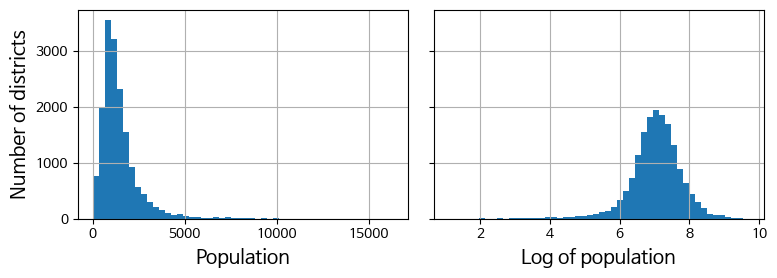

In [102]:
# 추가 코드 – 이 셀은 그림 2–17을 생성합니다
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

In [103]:
 housing[housing['population']>5000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19566,-122.43,37.43,17.0,11999.0,2249.0,5467.0,1989.0,4.8405,NEAR OCEAN
1385,-121.86,37.37,15.0,8162.0,2124.0,8793.0,2086.0,3.3306,<1H OCEAN
7349,-116.95,32.79,19.0,11391.0,3093.0,7178.0,2905.0,2.0326,<1H OCEAN
8162,-121.85,39.72,18.0,7272.0,1559.0,5022.0,1524.0,1.6911,INLAND
3076,-117.22,34.54,8.0,12526.0,2495.0,6133.0,2324.0,2.9072,INLAND
...,...,...,...,...,...,...,...,...,...
5215,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,INLAND
2086,-118.46,34.23,19.0,9902.0,2814.0,7307.0,2660.0,2.5850,<1H OCEAN
15712,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,<1H OCEAN
5766,-118.11,34.02,17.0,9559.0,1911.0,5279.0,1844.0,5.1515,<1H OCEAN


## 분포의 꼬리 처리 방안 2 - 버킷타이징
- 꼬리가 두꺼운 특성을 처리하는 또 다른 방법은 특성을 버킷타이징(bucketizing = 구간화)하는 것임
- 분포를 거의 동일한 크기의 버킷으로 자르고 income_cat 특성(계층적 샘플링)을 만들었던 것과 매우 비슷하게 특성값을 해당하는 버킷의 인덱스로 바꾸기
- 예를 들어 각 값을 백분위수로 바꿀 수 있음. 거의 동일한 크기의 버킷(샘플 수가 동일)을 사용하면 거의 균등 분포인 특성을 만들 수 있음 (좌우대칭 성립)
- 따라서, 추가적인 스케일링이 필요없음. 또한 버킷 개수로 나누어 0~1 사이 범위로 만들 수 있음

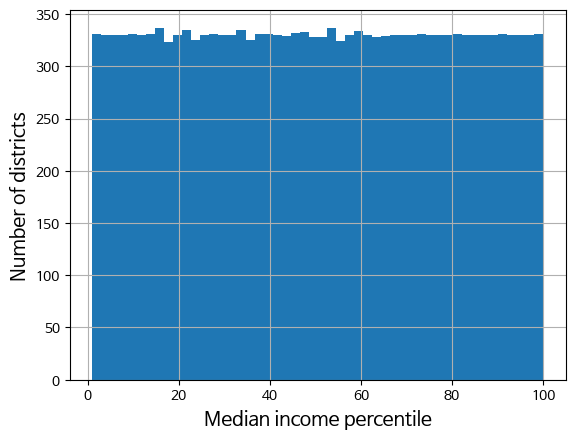

In [104]:
# 추가 코드 – 균등 분포를 얻는다는 것을 보여줍니다
percentiles = [np.percentile(housing["median_income"], p) # housing 데이터셋의 median_income 특성값의 백분위 수를 계산, p는 백분위(percentile -> %) 기준 -> ex) p=[0,25,50,75,100]
               for p in range(1, 100)] # 이 경우, 1%~100%까지의 기준값 계산 후 percentiles에 저장
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],   # [-np.inf, percentile 값들, np.inf]
                                 labels=range(1, 100 + 1)) # bins에서 설정한 임계값을 기준으로 1~100의 카테고리 할당
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: 1 백분위수 아래의 소득은 1로 레이블되고 99 백분위수 이상의 값은 100으로 레이블됩니다.
# 이 때문에 아래 분포의 범위가 1에서부터 100까지입니다(0에서부터 100까지가 아닙니다).

In [105]:
percentiles[1] # 1번째 백분위 수 -> 데이터셋의 median income 특성값들 중 1%에 해당하는 값 -> 카테고리 2로 매핑

1.254332

## 멀티모달 분포 변환 전략

###전략 1
- housing_median_age처럼 특성이 멀티모달 분포(mode라 부르는 정점이 두 개 이상 나타나는 분포)일 때 버킷타이징을 사용하면 도움이 될 수 있음
- 하지만, 이 때 버킷 ID를 수치가 아니라 카테고리로 다룸.
- 즉, 버킷 인덱스를(ex -> OneHotEncoder를 사용하여) 인코딩 해야한다는 의미
- 이런 방법을 사용하면 회귀 모델이 특성값의 여러 범주에 대해서 다양한 규칙을 쉽게 학습할 수 있음.
- 예를 들어, 35년 전에 지어진 집은 유행이 지난 독특한 스타일을 가지고 있어 같은 해에 지어진 다른 집보다 더 저렴함

### 전략 2
- 멀티모달 분포를 변환하는 또다른 방법은 (적어도 주요 모드에 대해) 중간 주택 연도와 특정 모드 사이의 유사도를 나타내는 특성을 추가하는 것
- 유사도 측정은 일반적으로 입력값과 고정 포인트 사이의 거리에만 의존하는 방사 기저 함수(radial basis function - RBF)를 사용
- 가장 널리 사용되는 RBF는 입력값이 고정 포인트에서 멀어질수록 출력값이 지수적으로 감소하는 가우스 RBF임
- 예를 들어 주택 연도 x와 주요 모드인 35 사이에 가우스 RBF 유사도는 아래와 같음 $$\exp(-\gamma (x-35)^2)$$
- 하이퍼파라미터 감마(gamma)는 x가 35에서 멀어짐에 따라 유사도 값이 얼마나 빠르게 감소하는지 결정함
- 사이킷런의 rbf_kernel() 함수를 사용하면 중간 주택 연도와 35 사이의 유사도를 재는 새로운 가우스 RBF 특성을 만들 수 있음


In [106]:
from sklearn.metrics.pairwise import rbf_kernel
# rbf_kernel() 함수에 매개변수로 입력값(housing_median_age 특성)과 고정 포인트값(35)을 2차원 오브젝트 형태로 전달
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [107]:
a = housing[["housing_median_age"]]
print(a.ndim)
b=[[35]]
b=np.array(b)
print(b.ndim)

2
2


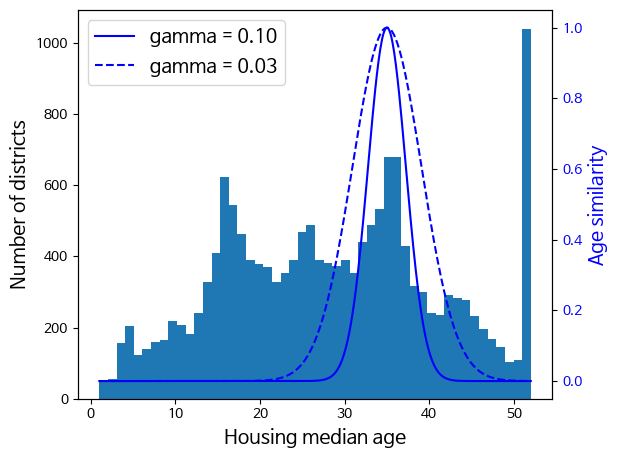

In [108]:
# 추가 코드 – 이 셀은 그림 2–18을 생성 합니다

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

위 그림 [그림 2-18]은 중간 주택 연도(실선)의 함수로 이 새로운 특성을 그래프로 나타낸 것
- gamma값에 따른 그래프의 형태를 알 수 있고, 새로운 연도 유사도 특성은 중간 주택 연도의 정점 근처인 35에서 정점에 다다름
- 이 연도의 데이터가 낮은 가격과 상관관계가 있다면 이 새로운 특성이 도움이 될 가능성이 높음


- 지금까지는 입력 특성만 보았지만 타깃값도 변환이 필요할 수 있음.
- 예를 들어 타깃 분포의 꼬리가 두껍다면 타깃을 로그값으로 바꿀 수 있음
하지만 이렇게 하면 회귀 모델이 중간 주택 가격 자체가 아니라 중간 주택 가격의 로그를 예측
- 타깃 분포의 꼬리 문제를 해결하면서 중간 주택 가격을 얻고 싶다면 모델 예측에 지수 함수를 적용해야 함
- 다행히 대부분의 사이킷런 변환기에는 역변환을 수행하는 inverse_transform()메서드가 있음
- 아래 코드는 StandardScaler를 사용하여 레이블을 스케일링하고 스케일링된 레이블로 간단한 선형 회귀 모델을 훈련한 후 새로운 데이터에서 예측을 만듦
- 마지막으로 예측된 값을 변환기의 inverse_transform()메서드를 사용해 원본 스케일로 되돌림

In [109]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # StandardScaler는 2D 입력을 기대하기 때문에 to_frame() 메서드로 시리즈를 데이터프레임 형태로 바꿔줌

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # 새로운 데이터라고 가정

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [110]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

- 위 방식이 잘 작동하지만 더 간단한 방법은 TransformedTargetRegressor를 사용하는 것임
- 이 클래스의 객체를 생성한 다음 회귀 모델과 레이블 변환기를 전달하고 스케일링되지 않은 원본 레이블을 사용해 훈련 세트로 훈련
- 이렇게 하면 변환기를 사용해 자동으로 레이블을 스케일링하고 스케일링된 레이블을 사용해 회귀 모델을 훈련
- 에측을 만들 때는 회귀 모델의 predict()메서드를 호출하고 변환기의 inverse_transform() 메서드를 사용해 예측을 생성

In [111]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [112]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## 사용자 정의 변환기

- 사이킷런이 유용한 변환기를 많이 제공하지만 사용자 정의 변환, 정제 연산, 특성 결합과 같은 작업을 위해 자신만의 변환기 필요
- 어떤 훈련도 필요하지 않은 변환의 경우, 넘파이 배열을 입력으로 받고 변환된 배열을 출력하는 함수를 작성
- 아래 예시 코드는 특성 분포의 꼬리가 두꺼울 때(특성이 양수이고 두꺼운 꼬리가 오른쪽이라고 가정), 로그 변환기를 정의하는 코드임


In [113]:
from sklearn.preprocessing import FunctionTransformer

# inverse_func 매개변수는 선택 사항. TransformedTargetRegressor에 이 변환기를 사용할 예정이라면 inverse_func 매개변수에 역변환 함수를 지정 가능
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

- 사용자 정의 변환 함수는 추가적인 인수로 하이퍼파라미터를 받을 수 있음
- 가우스 RBF 유사도를 계산하는 변환기를 다음과 같이 만들 수 있음

In [114]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [115]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

- 역함수 조건: 미분가능해야하고 x범위 내에서 미분했을 때, 모든 x에 대해 미분계수가 양수이거나 음수이어야 함
- RBF 커널은 고정 포인트에서 일정 거리(x)만큼 떨어진 값(y)이 거리가 0일 때를 제외하고 항상 두 개이기 때문에 역함수가 없음 (하나의 x에 대해 y값이 2개이므로 x범위 내에서 미분불가능)
- rbf_kernel()은 특성을 개별적으로 처리하지 않음. 두 개의 특성을 가진 배열(입력값과 고정포인트)을 전달하면 유사도를 측정하기 위해 2D 거리(유클리드 거리)를 계산
- 다음은 각 구역과 샌프란시스코 사이의 지리적 유사도를 측정하는 특성을 추가하는 코드


In [116]:
sf_coords = 37.7749, -122.41 # 샌프란시스코 좌표 -> 고정포인트
sf_transformer = FunctionTransformer(rbf_kernel,
                                     # kw_args 매개변수를 통해 고정 포인트 값과 감마값 설정 -> kw_args없이 transformer 정의 후 데이터 변환 시 해당 매개변수들을 지정해주는 건 불가능
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [117]:
sf_coords = 37.7749, -122.41
[sf_coords] # 2차원 형태로 존재

[(37.7749, -122.41)]

In [118]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

- 사용자 정의 변환기는 특성을 합칠 때도 유용. 다음은 첫 번째 입력 특성과 두 번째 특성 사이의 비율을 계산하는 FunctionTransformer임

In [119]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

- fit() 메서드에서 특정 파라미터를 학습하고 나중에 transform() 메서드에서 이를 사용하기 위해 훈련가능한 변환기가 필요할 땐, 사용자 정의 클래스가 필요
- 사이킷런은 덕 타이핑(duck typing: 상속이나 인터페이스 구현이 아닌 객체의 속성이나 메서드가 객체의 유형을 결정하는 방식)에 의존하기 때문에 사용자 정의 변환기 클래스가 특정 클래스를 상속할 필요가 없음
- 필요한 것은 self를 반환하는 fit(), transform(), fit_transform() 세 개의 메서드
- fit_transform() 메서드는 TrnasformerMixin을 상속하면 자동 생성 </br> -> 파이썬에서 이름에 Mixin이 포함된 클래스는 객체의 기능을 확장하려는 목적으로 만들어진 것 </br> -> TransformerMixin은 fit_transform() 메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공
- 기본적으로 이 메서드는 그냥 fit()과 transform()을 연달아 호출
- 또한 생성자에 \*args나 \*\*kwargs를 사용하지 않은 BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드 (get_params(), set_params())를 추가로 얻게 됨 </br> -> get_params()와 set_params() 함수는 사이킷런의 파이프라인과 그리드 서치에 꼭 필요한 메서드이므로 모든 추정기와 변환기는 BaseEstimator를 상속해야 함 </br> -> 이 두 메서드는 생성자에 명시된 매개변수만을 참조하므로 \*args나 \*\*kwargs는 사용할 수 없음

주의 사항
- sklearn.utils.validation 패키지에는 입력을 검증하기 위해 사용할 수 있는 함수가 여러 개 있음
- 사이킷런 파이프라인은 X와 y 두 개의 매개변수를 가진 메서드가 필요. 그래서 y를 사용하지 않지만 y=None이 필요함
- 모든 사이킷런 추정기는 fit() 메서드 안에서 n_features_in_을 설정하고 transform()이나 predict() 메서드에 전달된 데이터의 특성 개수가 동일한지 확인함
- fit() 메서드는 self를 반환해야 함
- 이 구현은 100% 완벽하지 않음. 모든 추정기는 데이터프레임이 전달될 때, fit() 메서드 안에서 feature_names_in_을 설정해야 함.
- 또한, 모든 변환기는 get_features_name_out_() 메서드와 역변환을 위한 inverse_transform() 메서드를 제공해야 함

In [120]:
# StandardScaler와 비슷하게 작동하는 사용자 정의 변환기
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin): # 정의하려는 함수의 매개변수로 BaseEstimator와 TransformerMixin 추가
    # StandardScaler에서 평균으로 나눌 것인지를 정하는 with_mean 매개변수 값을 True로 설정
    def __init__(self, with_mean=True):  # *args나 **kwargs를 사용하지 않습니다!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 사용하지 않더라도 y를 넣어 주어야 합니다
        X = check_array(X)  # X가 부동소수점 배열인지 확인합니다
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장합니다. 특성의 개수
        # 원래 feature_names_in_을 설정해야함
        return self  # 항상 self를 반환합니다!

    # 원래 get_feature_names_out() 메서드와 inverse_transform() 메서드도 정의해야함

    def transform(self, X):
        check_is_fitted(self)  # (훈련으로) 학습된 속성이 있는지 확인합니다
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean: # with_mean이 True인 경우 평균을 뺀 후 표준편차로 나누고 아닐 경우 표준편차로 나누기만 함
            X = X - self.mean_
        return X / self.scale_

- 하나의 사용자 변환기가 구현 안에서 다른 추정기를 사용할 수 있음 (종종 이렇게 사용)
- 다음 코드는 fit() 메서드 안에서 훈련 데이터에 있는 핵심 클러스터를 식별하기 위해 KMeans 클래스를 사용하는 사용자 변환기
- 이후 transform() 메서드에서 rbf_kernel()을 사용해 각 샘플이 클러스터 중심과 얼마나 유사한지 측정

In [121]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # 사이킷런 1.2버전에서 최상의 결과를 찾기 위해 반복하는 횟수를 지정하는 `n_init` 매개변수 값에 `'auto'`가 추가되었습니다.
        # `n_init='auto'`로 지정하면 초기화 방법을 지정하는 `init='random'`일 때 10, `init='k-means++'`일 때 1이 됩니다.
        # 사이킷런 1.4버전에서 `n_init`의 기본값이 10에서 `'auto'`로 바뀝니다. 경고를 피하기 위해 `n_init=10`으로 지정합니다.
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

- k-평균은 데이터에 있는 클러스터를 찾는 군집 알고리즘임
- 찾으려는 클러스터 개수 -> **n_clusters** 하이퍼파라미터로 지정, 훈련 이후 클러스터 중심은 **clusters_centers_** 속성을 통해 확인 가능
- KMeans의 fit() 메서드는 선택적 매개변수 **sample_weight**를 제공하며 이 매개변수로 **샘플의 상대적 가중치** 지정 가능
- k-평균은 확률적 알고리즘. 클러스터를 찾기 위해 무작위성에 의존하므로 결과를 동일하게 재현하려면 **random_state** 매개변수 지정 필요

In [122]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [123]:
# 클러스터 개수를 10으로 지정해 ClusterSimilarity 객체 생성
# 타겟값인 중간 주택 가격으로 가중치 부여해 훈련 세트에 있는 모든 구역에 위도와 경도로 fit_transform()을 호출
# k-평균으로 클러스터를 찾고 각 구역과 10개의 클러스터 중심 사이의 가우스 RBF 유사도를 측정
# 구역이 하나의 행이고 클러스터가 하나의 열인 행렬이 만들어짐
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels) # housing_labels는 이전에 빼둔 y값인 median_house_value

In [124]:
# 변환값 개수 출력 -> 변환값 == 경도,위도 특성을 통해 10개의 군집 생성 후 각 클러스터 중심(고정값)과 입력된 경도,위도 특성의 샘플값 간 유사도를 행렬 형태로 반환
# similarities의 각 샘플은 기존 경도,위도 특성의 샘플값과 10개의 클러스터 중심값 유사도가 행렬 형태로 존재 (ex -> [c1중심(경도,위도)과 기존(경도,위도)의 유사도, c2, c3, ...])
len(similarities)

16512

In [125]:
len(housing[['latitude','longitude']]) # 기존 경도,위도 특성의 샘플 개수

16512

In [126]:
similarities[:3].round(2) # 상위 3개의 변환값 소수점 둘째 자리까지 반올림해서 출력

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

In [127]:
similarities.max(axis=1) # 각 샘플에서 가장 높은 유사도를 가지는 군집의 유사도 출력

array([0.98661549, 0.98954599, 0.70010002, ..., 0.88643862, 0.99423208,
       0.94696798])

In [128]:
cluster_simil.kmeans_.cluster_centers_

array([[  33.84807612, -117.76264178],
       [  37.79339173, -121.02020116],
       [  34.05401714, -118.32417903],
       [  36.64651014, -119.5667933 ],
       [  40.22071398, -123.06364765],
       [  38.86476363, -121.2349362 ],
       [  32.93618777, -117.03359137],
       [  37.88199464, -122.33783088],
       [  34.69806089, -119.75396145],
       [  37.26057373, -121.95821379]])

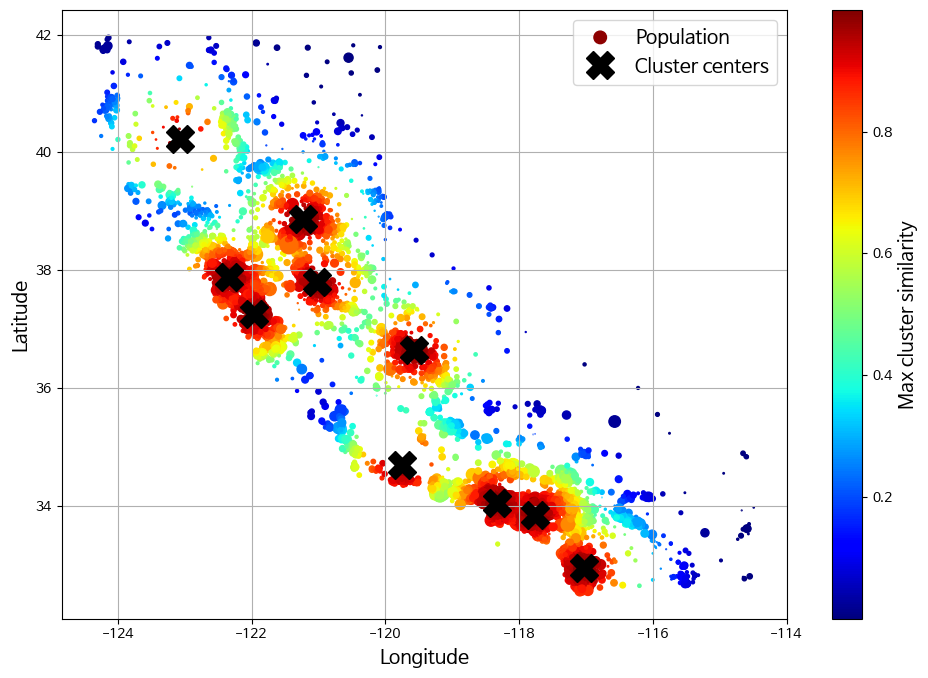

In [129]:
# 추가 코드 – 이 셀은 그림 2–19를 생성합니다

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

# 위도,경도로 scatter plot을 찍고 색상을 통해 가장 유사도가 높은 클러스터 중심과의 유사도를 표현
housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))

# 클러스터 중심의 위도 경도를 X 모양으로 표현
# 대부분의 클러스터가 인구가 많고 값비싼 지역에 위치 -> 중간 주택 가격을 가중치로 설정해서?
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1], # 경도 <-> X좌표
         cluster_simil.kmeans_.cluster_centers_[:, 0], # 위도 <-> Y좌표
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## 변환 파이프라인

- 앞선 코드처럼 변환 단계는 올바른 순서대로 실행되어야 함
- 사이킷런은 변환을 순서대로 처리하도록 도와주는 Pipeline 클래스를 제공
- Pipeline 생성자는 연속적인 단계를 정의하는 이름/추정기 쌍(2개의 원소를 가진 튜플)의 리스트를 받음
- 이름은 이중 밑줄 문자(__)를 포함하지 않으면서 고유하다면 어떤 것도 가능
- 추정기는 마지막을 제외하고 모두 변환기여야 함(즉, fit_transform() 메서드를 가져야함)
- 마지막 추정기는 변환기, 예측기부터 다른 타입의 추정기까지 무엇이든 가능함

In [130]:
# 수치 특성 전처리 파이프라인
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), # NaN값 처리
    ("standardize", StandardScaler()), # 스케일링을 통한 편차가 큰 특성값들 처리
])

- 변환기의 이름을 짓는 게 귀찮다면 make_pipeline() 함수를 사용할 수 있음
- 이 함수는 위치 매개변수로 변환기를 받고 클래스 이름을 밑줄 문자 없이 소문자로 바꾸어서 Pipeline 객체를 만듦(ex -> "simpleimputer")
- 여러 변환기가 같은 이름을 가지면 인덱스가 이름 뒤에 추가됨 (ex -> "foo-1", "foo-2" 등)
- 파이프라인의 fit() 메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달하고 마지막 단계에서는 fit() 메서드만 호출
- 파이프라인 객체는 마지막 추정기와 동일한 메서드를 제공함. 파이프라인 호출하면 모든 변환을 순서대로 적용하고 그 결과를 마지막 추정기 메서드로 전달 (ex -> 마지막 추정기가 변환기일 경우 transform()이나 fit_transform(), 예측기일 경우 predict()가 메서드가 됨)


In [131]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

**TIP**
- 주피터 노트북에서 import sklearn과 sklearn.set_config(display="diagram")을 실행하면 모든 사이킷런 추정기가 인터랙티브한 다이어그램으로 표현됨
- 이는 파이프라인을 시각화하는데 특히 유용함. num_pipline을 시각화 하려면 셀의 마지막에 num_pipeline을 입력 후 실행. 추정기를 클릭할 시 자세한 정보를 볼 수 있음

In [132]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [133]:
# num_pipeline의 fit_transform() 메서드를 호출하고 출력에서 처음 두 행의 출력을 소수점 둘째 자리에서 반올림
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [134]:
# def monkey_patch_get_signature_names_out():
#     """Monkey patch some classes which did not handle get_feature_names_out()
#        correctly in Scikit-Learn 1.0.*."""
#     from inspect import Signature, signature, Parameter
#     import pandas as pd
#     from sklearn.impute import SimpleImputer
#     from sklearn.pipeline import make_pipeline, Pipeline
#     from sklearn.preprocessing import FunctionTransformer, StandardScaler

#     default_get_feature_names_out = StandardScaler.get_feature_names_out

#     if not hasattr(SimpleImputer, "get_feature_names_out"):
#       print("Monkey-patching SimpleImputer.get_feature_names_out()")
#       SimpleImputer.get_feature_names_out = default_get_feature_names_out

#     if not hasattr(FunctionTransformer, "get_feature_names_out"):
#         print("Monkey-patching FunctionTransformer.get_feature_names_out()")
#         orig_init = FunctionTransformer.__init__
#         orig_sig = signature(orig_init)

#         def __init__(*args, feature_names_out=None, **kwargs):
#             orig_sig.bind(*args, **kwargs)
#             orig_init(*args, **kwargs)
#             args[0].feature_names_out = feature_names_out

#         __init__.__signature__ = Signature(
#             list(signature(orig_init).parameters.values()) + [
#                 Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

#         def get_feature_names_out(self, names=None):
#             if callable(self.feature_names_out):
#                 return self.feature_names_out(self, names)
#             assert self.feature_names_out == "one-to-one"
#             return default_get_feature_names_out(self, names)

#         FunctionTransformer.__init__ = __init__
#         FunctionTransformer.get_feature_names_out = get_feature_names_out

# monkey_patch_get_signature_names_out()

In [135]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [136]:
# 앞에서 봤듯이 데이터 프레임으로 재구성하려면 파이프라인의 get_feature_names_out() 메서드를 사용해 컬럼명 지정
# 변형 전 데이터프레임으로부터 .index를 사용해 인덱스 지정
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [137]:
df_housing_num_prepared.head(2)  # 추가 코드

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


- 파이프라인은 인덱싱을 지원. 예를 들어, pipeline[1]은 파이프라인에 있는 두 번째 추정기를 반환
- pipeline[:-1]은 마지막 추정기를 제외한 모든 추정기를 담은 파이프라인 객체를 반환
- 이름/추정기 쌍의 리스트인 steps 속성을 통해 추정기를 참조할 수 있음
- 이름과 추정기를 매핑한 딕셔너리한 names_steps 속성을 사용할 수도 있음. 예를 들어, num_pipeline["simpleimputer"]는 이름이 "simpleimputer"인 추정기를 반환

In [138]:
num_pipeline.steps # 파이프라인을 구성하고 있는 추정기들을 이름/추정기 쌍의 리스트 형태로 출력

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [139]:
num_pipeline[1] # 파이프라인의 2번째 추정기를 출력

StandardScaler()

In [140]:
num_pipeline[:-1] # 파이프라인의 마지막 추정기를 제외한 모든 추정기를 담은 파이프라인 객체를 반환

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [141]:
num_pipeline.named_steps["simpleimputer"] # 이름과 추정기를 매핑한 딕셔너리 속성을 사용해 이름이 "simpleimputer"인 추정기를 반환

SimpleImputer(strategy='median')

In [142]:
num_pipeline.set_params(simpleimputer__strategy="median") # 파이프라인이름.set_params(추정기이름__매개변수=~)로 파라미터 값 설정

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

하나의 변환기로 각 열마다 적절한 변환 적용을 할 수 있게하는 ColumnTransformer
- 앞서 만든 num_pipeline을 수치형 특성에 새로 만든 cat_pipeline을 범주형 특성에 적용하는 예시

**TIP**
- 튜플에 변환을 적용하는 대신 삭제하고 싶은 특성이 있다면 "drop"으로 지정.
- 변환을 적용하지 않을 특성이 있다면 "passthrough"로 지정
- 기본적으로 나머지열(나열되지 않은 열)은 삭제. remainder 파라미터의 기본값이 "drop"이기 때문
- 나머지 열을 다르게 처리하고 싶다면 remainder 하이퍼파라미터에 변환기(또는 "passthrough")를 지정할 수 있음

In [143]:
from sklearn.compose import ColumnTransformer # ColumnTransformer 클래스를 import

# 수치형 특성과 범주형 특성의 리스트 생성
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# 범주형 특성을 처리할 새로운 파이프라인 생성
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# ColumnTransformer 객체 생성 - 세 개의 원소를 가진 튜플의 리스트를 받음
# 각 튜플은 이름(이중 밑줄 문자가 없고 고유해야 함), 변환기, 변환기가 적용될 열 이름(또는 인덱스)의 리스트로 구성
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

모든 특성을 일일이 나열하는 것이 번거로울 때, make_column_selector
- 수치형이나 범주형처럼 주어진 타입의 모든 특성을 자동으로 선택해주는 make_column_selector 클래스를 사용
- 이 클래스의 객체를 특성 이름이나 인덱스 대신 ColumnTransformer에 전달할 수 있음 <br/>

변환기에 이름을 짓는 것이 귀찮을 때, make_column_transformer()
- make_pipeline()처럼 자동으로 이름을` 지정하는 make_column_transformer()함수를 사용할 수 있음
- 아래 코드는 앞에서와 동일하게 ColumnTransformer를 생성 -> 다만 변환기 이름은 "num"과 "cat"이 아닌 "pipeline-1"과 "pipeline-2"로 자동 지정

In [144]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [145]:
housing_prepared = preprocessing.fit_transform(housing) # 넘파이 배열 반환되므로 데이터프레임으로 감싸줘야 함

**Note**
- cat_pipeline의 OneHotEnCoder는 희소행렬을 반환하지만 num_pipeline은 밀집 행렬을 반환 </br> -> processing이라는 ColumnTransformer 안에 두 파이프라인의 반환 행렬 형태가 섞여있음
- 희소 행렬과 밀집 행렬이 섞여 있을 때, ColumnTransformer는 최종 행렬의 밀집 정도(0이 아닌 원소의 비율)를 추정함
- 밀집도가 임곗값(기본적으로 sparse_threshold=0.3)보다 낮으면 희소 행렬을 반환 -> 이 예에서는 밀집 행렬이 반환

In [146]:
# 추가 코드 – 필요하다면 데이터프레임으로 만들 수 있습니다
housing_prepared_fr = pd.DataFrame(
    housing_prepared, # 파이프라인을 통해 전처리된 (숫자형 변수와 범주형 변수 모두 전처리된) 데이터셋
    columns=preprocessing.get_feature_names_out(), # 파이프라인으로부터 변환된 데이터셋의 컬럼들 출력
    index=housing.index) # 변환된 넘파이 형태의 데이터셋으로부터 인덱스 받아오기
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


**아래는 지금까지 실행한 모든 변환을 수행할 단일 파이프라인임** </br>

**<단일 파이프라인을 통해 할 일과 그 이유>** </br>
- 대부분의 머신러닝 알고리즘은 누락된 값을 기대하지 않기 때문에 수치형 특성의 경우 **누락된 값을 중간값으로 대체**함. 범주형 특성의 경우 **누락된 값을 가장 많이 등장하는 카테고리**로 바꿈
- **대부분의 머신러닝 알고리즘은 수치 입력**만 받기 때문에 범주형 특성을 **원-핫 인코딩**함
- **비율 특성인 bedrooms_ratio, rooms_per_house, people_per_house**를 계산하여 추가함. 이런 특성은 **중간 주택 가격과 상관관계가 높으므로** 머신러닝 모델에 도움이 되기를 기대해볼 수 있음
- 몇 가지 **클러스터 유사도 특성**을 추가함. 위도와 경도보다 모델에 더 유용할 가능성이 높음 </br> -> **각 샘플이 클러스터 중심과 얼마나 유사한지 그 정도가 중간 주택 가격과 연관이 있을 수 있다는 뜻**
- 대부분의 모델은 **균등 분포**나 **가우스 분포(종 모양)**에 가까운 특성을 선호하기 때문에 **꼬리가 두꺼운 분포를 띠는 특성**을 **로그값**으로 바꿈
- 대부분의 머신러닝 알고리즘은 모든 특성이 대체로 **동일한 스케일**을 가질 때 잘 작동하므로 모든 수치 특성을 표준화함

In [147]:
def column_ratio(X): # 비율 특성을 계산하기 위해 만든 함수
    return X[:, [0]] / X[:, [1]]

# get_feature_names_out에 사용, 모든 비율 특성에 대해 이름을 ratio라고 반환 -> 파이프라인의 get_feature_names_out 사용 시 '파이프라인이름__변환전컬럼이름'으로 설정되는 점을 이용
# 각 비율 특성을 만들 때마다 서로 다른 이름(ex -> 생성된 비율 특성의 이름)의 파이프라인 적용해 변환하면 '비율 특성1__ratio', '비율 특성2__ratio' 와 같이 feature 이름이 설정됨
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

# 비율 특성에 대한 pipeline 정의 - make_pipeline()기반
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name), # 비율 특성 계산 함수와 ["ratio"]반환 함수
        StandardScaler())

# 꼬리가 두꺼운 특성을 처리할 log_pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"), #
    StandardScaler())
# 위에서 정의한 커스텀 변환기인 ClusterSimilarity - KMeans 알고리즘 기반으로 클러스터 중심을 찾아 rbf 함수로 유사도 검사를 진행해 경도 위도를 변환
# get_feature_names_out()시 클러스터마다의 유사도 컬럼이 생성될 수 있도록 위에서 정의함
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # 남은 특성: housing_median_age

In [148]:
# 새로 정의한 단일 파이프라인으로 모든 특성에 대해 변환이 수행되고 24개의 컬럼을 가진 넘파이 배열이 출력됨
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [149]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__클러스터 0 유사도', 'geo__클러스터 1 유사도',
       'geo__클러스터 2 유사도', 'geo__클러스터 3 유사도', 'geo__클러스터 4 유사도',
       'geo__클러스터 5 유사도', 'geo__클러스터 6 유사도', 'geo__클러스터 7 유사도',
       'geo__클러스터 8 유사도', 'geo__클러스터 9 유사도',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

# 모델 선택과 훈련

**지금까지 한 것**
1. 문제 정의
2. 데이터 읽어들이고 탐색
3. 훈련 세트와 테스트 세트로 나눔
4. 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하는 전처리 파이프라인 작성
**지금부터 할 것**
- 머신러닝 모델 선택 및 훈련

## 훈련 세트에서 훈련하고 평가하기

In [150]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 훈련
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b2...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2ac76f2980>)])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [151]:
# 처음 다섯 예측값 출력
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = 십의 자리에서 반올림

array([243700., 372400., 128800.,  94400., 328300.])

실제 값과 비교합니다:

In [152]:
# 실제값 출력해 비교
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [153]:
# 추가 코드 – 책에서 언급한 에러 비율을 계산합니다
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.8%, -23.0%, 26.6%, -1.8%, -9.3%


- 작동하긴 하지만 항상 맞지는 않음, 첫 번째 예측은 $200,000 이상 많이 벗어났지만 다른 예측은 나은 편
- 두 개는 25% 정도 벗어났고 다른 두 개는 차이가 10% 미만
- 전체 훈련 세트에 대해 이 회귀모델의 RMSE를 측정하기 위해 사이킷런의 mean_squared_error() 함수에 squared 매개변수를 False로 지정하여 계산

In [154]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68687.89176590038

- 대부분 구역의 중간 주택 가격은 \$120,000에서 \$265,000사이임. 그러므로 예측 오차가 $68,628인 것은 좋지 못함 -> 과소적합(Underfitting)된 사례임
- 이 결과는 특성들이 좋은 예측을 만들만큼 충분한 정보를 제공하지 못했거나, 모델이 충분히 강력하지 못하다는 것을 나타냄
- 과소적합을 해결하는 주요 방법은 1) 더 강력한 모델 선택 2) 훈련 알고리즘에 더 좋은 특성 주입 3) 모델의 규제 감소
- 이 모델을 규제를 사용하지 않았으므로 마지막 옵션을 제외하고, 특성을 더 많이 추가하기 전에 더 복잡한 모델을 시도
- DecisionTreeRegressor 모델은 데이터에서 복잡한 비선형 관계를 찾을 수 있는 강력한 모델임

In [155]:
from sklearn.tree import DecisionTreeRegressor

# 결정 트리 모델 훈련
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b2...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2ac76f2980>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

- 오차가 0인 걸로 보아 모델이 데이터에 심하게 과대적합되었을 가능성이 높음
- 확신이 드는 모델을 론칭하기 전까지는 테스트 세트를 사용하지 않을 것이기 때문에 훈련 세트의 일부분으로 훈련하고 다른 일부분을 모델 검증에 사용해야 함


In [156]:

housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

## 교차 검증을 사용한 평가

**과대적합된 결정트리 모델을 제대로 평가하는 방법**

*방법 1)* <br/>
train_test_split 함수를 사용해 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나눈 다음, 더 작은 훈련 세트에서 모델을 훈련시키고 검증 세트로 모델을 평가하는 방법 <br/>
*방법 2)* <br/>
사이킷런의 k-폴드 교차 검증(k-fold cross-validation) 기능 <br/>
다음 코드는 훈련 세트를 폴드(fold)라 불리는 중복되지 않은 10개의 서브셋으로 랜덤 분할함 <br/>
그 다음 결정 트리 모델을 10번 훈련하고 평가하는데, 매번 다른 폴드를 선택해 평가에 사용 <br/>
나머지 9개 폴드가 훈련에 사용되고, 10개의 평가점수가 담긴 배열이 결과가 됨


In [157]:
from sklearn.model_selection import cross_val_score

# 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대함
# 따라서, RMSE의 음숫값을 출력하는 neg_mean_squared_error 함수를 적용하고 원래의 RMSE 값을 얻기 위해 cross_val_score() 메서드 앞에 '-' 부호를 추가
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10) # cv는 fold의 개수

In [158]:
# 결과 출력 -> 이전처럼 훈련 세트만으로 훈련하고 측정했던 오차값(RMSE=0)과는 다르게 훨씬 나쁜 66,868이 나옴
# 교차 검증으로 모델의 성능을 추정하는 것뿐만 아니라 이 추정이 얼마나 정확한지 표준편차도 측정 가능
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [159]:
# 추가 코드 – 선형 모델의 점수를 계산합니다
# 선형 회귀 모델에서 교차 검증을 이용해 RMSE를 계산하면 평균 RMSE가 69,858 표준편차가 4,182가 나옴
# 훈련 세트만으로 훈련하고 측정했던 오차값(RMSE=68688)과 유사한 값
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

- 결정 트리 모델이 선형 회귀 모델보다 아주 조금 나은 것 같지만 심각한 과대적합 때문에 차이가 미미함
- 훈련 오차(0)가 작고 검증 오차가 높기 때문에 과대 적합(Overfitting)임

**경고:** 다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

- 마지막으로 RandomForestRegressor 모델 시도. 랜덤 포레스트는 특성을 랜덤으로 선택해서 많은 결정트리를 만들고 예측의 평균을 구하는 방식으로 작동
- 서로 다른 모델들로 구성된 이런 모델을 앙상블(ensemble)이라고 하는데 앙상블은 기반 모델(여기서는 결정 트리)의 성능을 높임

In [160]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [161]:
# 점수확인
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

교차 검증으로 측정한 RMSE(검증 에러)와 훈련 세트로 측정한 RMSE(훈련 에러)를 비교해 보죠:

In [162]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

훈련 에러가 검증 에러 보다 훨씬 낮기 때문에 모델이 훈련 세트에 과대적합되었다는 의미입니다. 가능한 또 다른 이유는 훈련 데이터와 검증 데이터의 불일치입니다. 여기서는 한 데이터 셋을 섞은 다음 두 부분으로 나누었기 때문에 이 경우에 해당하지 않습니다.

과대 적합을 해결하는 방안은 모델을 단순화(특성 감소)하거나 제한을 하거나(규제) 더 많은 훈련 데이터를 모으는 것임

랜덤 포레스트를 더 깊이 살펴보기 전에 하이퍼파라미터 조정에 너무 많은 시간을 들이지 않고 여러 종류의 머신러닝 알고리즘에서 다양한 모델(다양한 커널의 서포트 벡터 머신, 신경망 등)을 시도해봐야 함

가능성 있는 2~5개의 모델을 선정하는 것이 목정

# 모델 미세 튜닝

가능성 있는 모델들을 추렸다고 가정했을 때, 이제 모델들을 미세 튜닝해야 함

## 그리드 탐색

- 가장 단순한 방법은 만족할만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것 (매우 지루하고 많은 경우의 수를 탐색해야하므로 시간도 많이 필요함)

- 대신 사이킷런의 GridSearchCV를 사용하는 것이 좋음. 탐색하고자 하는 하이퍼 파라미터와 시도해볼 값을 지정하기만 하면 됨 -> 교차 검증을 사용해 가능한 모든 하이퍼파라미터 조합을 평가함

- 다음 코드는 RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합을 탐색

**경고:**  다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

In [163]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# param_grid에는 두 개의 딕셔너리가 존재. GridSearchCV가 먼저 첫 번째 딕셔너리에 지정된 n_clusters와 max_features 하이퍼파라미터 값의 3 x 3 = 9개 조합을 모두 평가
# 그다음 두 번째 딕셔너리에 있는 하이퍼파라미터 값의 2 x 3 = 6개 조합을 모두 평가
# 따라서 그리드 서치는 총 9 + 6 = 15개의 하이퍼파라미터 조합을 탐색함. 3-fold 교차 검증을 사용하므로 각 조합마다 3번씩 파이프라인을 훈련하며, 이는 총 15 x 3 = 45번 훈련이 일어난다는 의미
# 시간이 걸리지만 정해둔 범위 내에서 최적의 하이퍼파라미터 조합을 얻을 수 있음
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b2ac76f2980>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

**복잡한 파이프라인 내부 하이퍼파라미터 조정**

- 파이프라인이나 ColumnTransformer가 **추정기를 겹겹이 감싸고 있더라도 추정기의 모든 하이퍼파라미터를 지정할 수 있음.**
- 예를 들어 사이킷런은 "preprocessing__geo__n__clusters"를 이중 밑줄 문자를 기준으로 나누고 파이프라인에서 "preprocessing"이란 이름의 추정기를 찾음
- 그러면 결국 전처리 ColumnTransformer를 찾게 됨. 그 다음 ColumnTransformer 안에서 "geo"란 이름의 변환기를 찾음. 이 변환기는 위도와 경도에 사용하는 ClusterSimilarity
- 마지막으로, 이 변환기의 n_clusters 하이퍼파라미터를 찾음.
- 비슷하게 random_forest__max_features는 "random_forest"란 이름의 추정기에 있는 max_features 하이퍼파라미터를 의미함


**TIP**
- 사이킷런 파이프라인으로 전처리 단계를 감싸면 **모델의 하이퍼파라미터와 함께 전처리 하이퍼파라미터를 튜닝 가능**
- 두 하이퍼파라미터는 상호 작용하는 경우가 많기 때문에 바람직함. 예를 들어, n_clusters를 증가시키면 max_features도 증가시켜야함.
- 파이프라인 변환기를 훈련하는데 계산 비용이 많이 든다면 파이프라인의 **memory 매개변수에 캐싱(caching) 디렉터리 경로를 지정할 수 있음**
- 파이프라인을 처음 훈련할 때 사이킷런이 훈련된 변환기를 이 디렉터리에 저장하고 **동일한 하이퍼파라미터로 파이프라인을 다시 훈련하는 경우 사이킷런은 캐싱된 변환기를 로드**


`full_pipeline.get_params().keys()`를 사용해 전체 하이퍼파라미터 리스트를 얻을 수 있습니다:

In [164]:
# 추가 코드 – get_params().keys() 출력의 일부를 보여 줍니다
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

최상의 하이퍼파라미터 조합은 다음과 같습니다:

In [165]:
grid_search.best_params_ # 이 때, 15가 n_clusters에 대한 탐색 범위의 최댓값이기 때문에 더 큰 값을 지정하여 다시 검색해야함. 계속 점수가 향상될 가능성이 있음

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [166]:
# 최적의 하이퍼파라미터로 학습된 추정기를 얻을 수 있음
# GridSearchCV가 refit = True로 초기화되었다면 교차 검증으로 최적의 추정기를 찾은 다음 전체 훈련 세트로 다시 훈련시킴
# 일반적으로 데이터가 많을수록 성능이 향상되므로 좋은 방법임
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7b2ac6f...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2ac5505e40>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

- 평가 점수는 **grid_search.cv_results** 속성으로 얻을 수 있음
- 이 속성은 딕셔너리이지만 데이터프레임으로 감싸면 각 하이퍼파라미터 조합과 교차 검증 분할에 대한 테스트 점수와 모든 분할에 대한 평균 테스트 점수를 확인하기 좋음
- 최상의 모델에 대한 평균 테스트 RMSE 점수는 44,042임. 기본 하이퍼파라미터 값을 사용해 얻은 점수(47,019)보다 좋음

In [167]:

cv_res = pd.DataFrame(grid_search.cv_results_) # dict -> DataFrame
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True) # neg_root_mean_squared_error를 통해 구해졌으므로 내림차순해야 절댓값이 작은 게 위로 -> 이후 음수 부호 처리

# 추가 코드 – 데이터프레임을 깔끔하게 출력하기 위한 코드입니다
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64) # neg_root_mean_squared_error를 통해 구해졌으므로 음수 부호를 붙여줘야함

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


## 랜덤 탐색

- 그리드 서치 방법은 이전 예제와 같이 비교적 적은 수의 조합을 탐구할 때 좋음. 하지만 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV가 종종 선호됨
- GridSearchCV와 거의 같은 방식으로 사용할 수 있지만 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가
- 이 방식의 주요 장점 두 가지는 다음과 같음 </br> </br>
1) 하이퍼파라미터 값이 연속적이면(또는 이산적이지만 가능한 값이 많다면) **랜덤 서치**를 1,000번 실행했을 때 각 하이퍼파라미터마다 1,000개이 다른 값을 탐색함. 반면 **그리드 서치**는 하이퍼파라미터에 대해 나열한 몇 개의 값만을 탐색 </br> </br>
2) 어떤 하이퍼파라미터가 성능 면에서 큰 차이를 만들지 못하지만 아직 이 사실을 모른다고 가정. 10개의 가능한 값이 있을 때 이를 그리드 서치에 추가하면 훈련이 10배 더 오래걸림. 하지만 이 하이퍼파라미터를 랜덤 서치에 추가하면 탐색 시간이 더 늘어나지 않음. 예를 들어, 6개의 하이퍼파라미터에 대해 각각 10개의 값을 탐색한다면 그리드 서치는 백만 번 모델을 훈련해야하지만 랜덤 서치는 지정한 반복 횟수만큼 실행


- 사이킷런은 **HalvingRandomSearchCV**와 **HalvingGridSearchCV** 하이퍼파라미터 탐색 클래스도 제공 </br> (GridSearchCV & RandomizedSearchCV -> Halving + ~~)
- 빠르게 훈련하고 대규모 하이퍼파라미터 공간을 탐색하기 위해 계산 자원을 더 효율적으로 사용
- 작동 방식 </br>
1) 첫 번째 반복에서 많은 하이퍼파라미터 조합('후보')이 그리드 서치나 랜덤 서치를 사용해 생성 </br>
2) 이 후보들을 사용해 모델을 훈련하고 이전과 같은 방식으로 교차 검증을 사용해 평가 </br>
3) 첫 번째 반복의 속도를 높이기 위해 **제한된 자원**으로 훈련 </br>
(ex -> 훈련 세트의 작은 일부분에서 훈련 or 하이퍼파라미터 제한을 통해 반복 횟수 조정 등)</br>
4) 모든 후보를 평가한 후에 최상의 후보만 다음 단계로 넘어가 더 많은 자원을 사용 </br>
5) 몇 번의 반복이 진행된 후 최종 후보들이 전체 자원을 사용해 평가 -> 하이퍼파라미터 튜닝 시간 단축 가능 </br>
[참고 링크](https://bit.ly/halving-grid-search)

In [168]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

아래는 랜덤 서치 CV를 통해 30개(`n_iter` × `cv`)의 랜덤한 하이퍼파라미터 조합을 시도합니다:

**경고:**  다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다:

In [169]:
# 다음과 같이 하이퍼파라미터마다 가능한 값의 리스트나 확률 분포를 제공해야 함
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b2ac76f2620>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b2ac76f1fc0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [170]:
# 추가 코드 – 랜덤 탐색 결과를 출력합니다
cv_res = pd.DataFrame(rnd_search.cv_results_) # dict -> DataFrame
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True) # neg_root_mean_squared_error를 통해 구해졌으므로 내림차순해야 절댓값이 작은 게 위로 -> 이후 음수 부호 처리
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64) # neg_root_mean_squared_error를 통해 구해졌으므로 음수 부호를 붙여줘야함
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41287,42071,42627,41995
8,32,7,41690,42513,43224,42475
0,41,16,42223,42959,43321,42834
5,42,4,41818,43094,43817,42910
2,23,8,42264,42996,43830,43030


**보너스 섹션: 하이퍼파라미터를 위한 샘플링 분포 선택 방법** <br>
(랜덤 탐색의 경우 하이퍼파라미터에 범위값이나 분포를 줄 수 있으므로 특히 유용)

* `scipy.stats.randint(a, b+1)`: a~b 사이의 _이산적인_ 값을 가진 하이퍼파라미터. 이 범위의 모든 값은 동일한 확률 가집니다.
* `scipy.stats.uniform(a, b)`: 매우 비슷하지만 _연속적인_ 파라미터에 사용합니다.
* `scipy.stats.geom(1 / scale)`: 이산적인 값의 경우 주어진 스케일 안에서 샘플링하고 싶을 때 사용합니다. 예를 들어 scale=1000인 경우 대부분의 샘플은 이 범주 안에 있지만 모든 샘플 중 10% 정도는 100보다 작고, 10% 정도는 2300보다 큽니다.
* `scipy.stats.expon(scale)`: `geom`의 연속적인 버전입니다. `scale`을 가장 많이 등장할 값으로 지정합니다.
* `scipy.stats.loguniform(a, b)`: 하이퍼파라미터 값의 스케일을 어떻게 지정할지 모를 때 사용합니다. a=0.01, b=100으로 지정하면 0.01과 0.1 사이의 샘플링과 10과 100 사이의 샘플링 비율이 동일합니다.

다음은 `randint()`, `uniform()`, `geom()`, `expon()`에 대한 확률 질량 함수(이산형 변수)와 확률 밀도 함수(연속형 변수)의 그래프입니다:

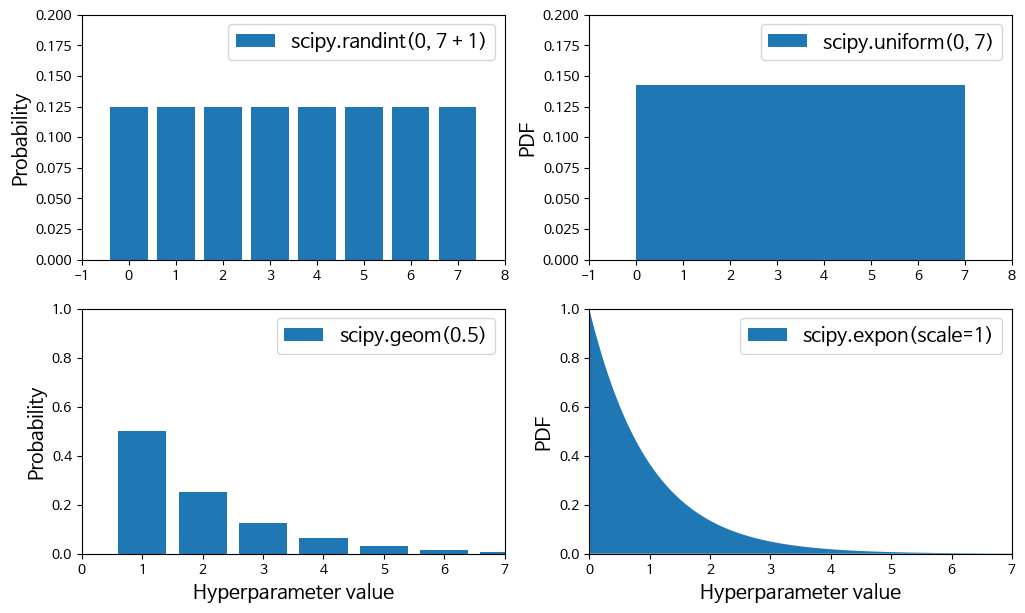

In [171]:
# 추가 코드 – 랜덤 서치에서 사용할 수 있는 몇가지 분포에 대한 그래프

from scipy.stats import randint, uniform, geom, expon

# np.arange(0, 7 + 1): 0(시작값)~7+1(끝값-미포함) 범위에서 step=1로 하는 요소를 가진 배열 반환
# scipy.stats.randint(0, 7 + 1): 0(시작값)~7+1(끝값-미포함) 범위에서 이산 균일 분포 생성
# pmf: 이 분포에 대해 xs1 배열의 각 값에 대한 확률 질량 함수(PMF)를 계산. 이는 균일 분포이므로 0부터 7까지의 각 숫자는 동일한 발생 확률을 갖습니다.
# 이산적인 값을 가진 하이퍼파라미터를 위한 분포이므로 0~7 범위에서 xs1(이산적인 값들 - 0~7)의 각 값들이 발생할 확률을 토대로 확률 질량 함수생성 분포가 균일하고 가능한 결과가 8개(0~7)이므로 각 결과의 확률은 1/8
xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

# np.linspace: 0(시작값)~7(끝값->포함) 범위에서 일정한 간격으로 500개의 값을 가지는 배열 반환
# scipy.stats.uniform(0, 7): 0(시작값)~7(끝값->포함) 범위에서 연속 균일 분포 생성
# pdf: 이 분포에 대해 xs2 배열의 각 값에 대한 확률 밀도 함수(PDF)를 계산. 균일 분포에서 밀도는 구간에 걸쳐 일정하며 이 경우 PDF는 평평한 수평선이 됨
# 이전 코드 조각의 PMF와 달리 여기의 PDF 값은 확률 자체가 아니라 밀도임. 주어진 구간에서 PDF 곡선 아래의 면적은 해당 구간 내에 변수가 포함될 확률을 나타냅니다.
# 연속적인 값을 필요로하는 하이퍼파라미터를 위한 분포이므로 확률 밀도 함수
xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

# geom(0.5)은 기하학적 분포를 생성하는 SciPy 통계 모듈의 함수 호출. 매개변수 '0.5'는 각 시행의 성공 확률
# 기하 분포는 일련의 독립적이고 동일하게 분포된 베르누이 시행에서 성공을 거두는 데 필요한 시행 횟수를 모델링
# .pmf(xs3)는 xs3 배열의 각 값에 대한 확률 질량 함수(PMF)를 계산 기하 분포의 맥락에서 이는 1차, 2차, 3차, ..., 8차 시도에서 첫 번째 성공이 발생할 확률을 계산한다는 의미
# 각 시행마다 성공 확률이 0.5로 동일할 때, N번째 시행에서 성공할 확률
xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

# expon(scale=1).pdf(xs4):
# expon(scale=1)은 지수 분포를 생성하는 SciPy 통계 모듈의 함수 호출입니다. 'scale' 매개변수는 분포의 비율 매개변수(흔히 람다, λ로 표시됨)의 역수입니다. 이 경우 척도 1은 비율 1을 의미합니다.
# 지수 분포는 사건이 일정한 평균 비율로 연속적이고 독립적으로 발생하는 포아송 과정에서 사건 사이의 시간이나 공간을 모형화하는 데 사용되는 연속 확률 분포입니다.
# .pdf(xs4)는 xs4 배열의 각 값에 대해 PDF(확률 밀도 함수)를 계산합니다. 지수 분포의 PDF는 기하급수적으로 감소하며, 처음에는 급격하게 감소하다가 값이 증가함에 따라 평준화됩니다.
xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)") # x and height
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

다음은 `expon()`와 `loguniform()`의 확률 밀도 함수(왼쪽 열), log(X)의 확률 밀도 함수(오른쪽 열)입니다. 오른쪽 열은 하이퍼파라미터 스케일의 분포를 보여줍니다. `expon()`는 대체적으로 원하는 스케일을 따라 하이퍼파라미터를 선택하고 작은 스케일 쪽으로는 긴 꼬리를 형성합니다. 하지만 `loguniform()`는 스케일에 영향을 받지 않고 모두 동일한 확률을 가집니다:

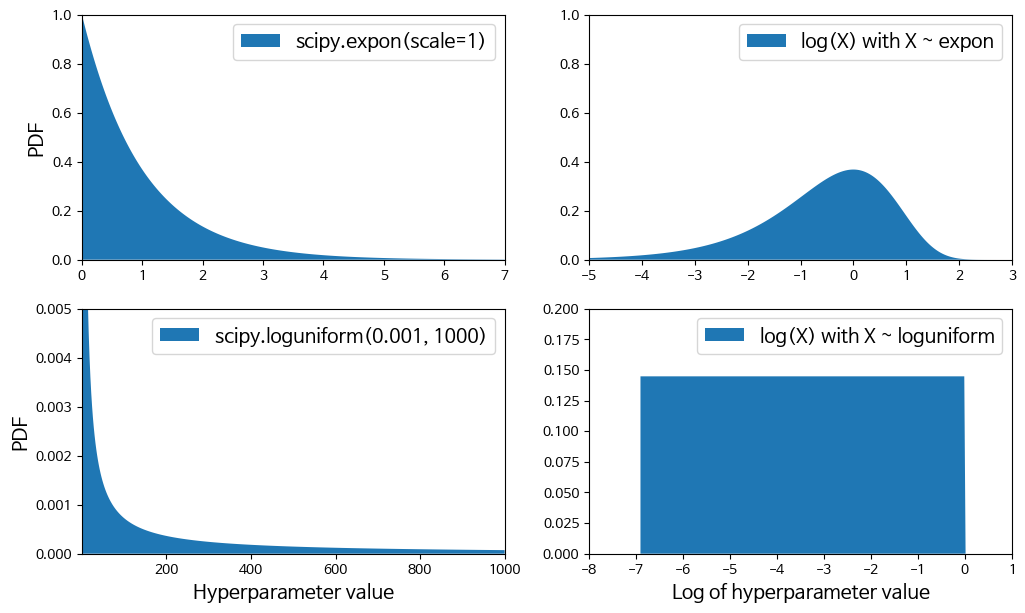

In [172]:
# 추가 코드 – expon와 loguniform의 차이를 보여줍니다
# 아래 코드는 선형 척도에서 봤을 때 지수 분포와 로그-균일 분포가 동일해보이지만 사실 거리에 따른 변화율을 나타내는 로그척도에서 봤을 때, 그 차이가 분명히 드러나는 것을 보여줌

from scipy.stats import loguniform

# 정해진 스케일과 근사한 범위에서 작은 값에 치중하고 싶을 때 사용
xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

# 마땅히 하이퍼파라미터의 스케일을 알 수 없을 때 사용, 특히 여러 자릿수 하이퍼파라미터 탐색에 유용함
# 3번째 그림은 선형 척도에서 그린 로그 균일 분포로 작은 값에 편향되어 보이지만 실제로는 그렇지 않고 로그 척도(log scale)에서 표현할 시 균일
# 선형 척도란 선형 눈금에 의해 표현된 것으로 축의 거리와 값의 차이가 동일 (눈금2~눈금1 == 2-1)
# 로그 눈금은 매우 넓은 범위의 값에 대한 수치 데이터를 간결하게 표시하는 방법임. 로그 척도에서 축의 동일한 거리는 절대값의 동일한 차이가 아니라 동일한 비율 또는 변화율을 나타냄
# 사용 사례: 선형 척도는 선형적으로 변화하는 데이터에 사용되거나 차이를 강조하는 것이 중요한 경우에 사용됩니다.
# 로그 척도는 데이터에 기하급수적인 증가 또는 감소가 포함되거나 곱셈 요인을 처리할 때(예: 급격한 증가, 큰 범위의 값 또는 낮은 값의 작은 변화가 높은 값의 변화만큼 중요한 경우) 사용됩니다. ).
xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## 앙상블 방법
- 모델을 세밀하게 튜닝하는 또 다른 방법은 최상의 모델을 연결해보는 것. 결정 트리의 앙상블인 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼 모델의 그룹 (또는 앙상블)이 최상의 단일 모델보다 더 나은 성능을 발휘할 수 있음
- 특히 개별 모델이 각기 다른 형태의 오차를 만들 때 좋음.
- 예를 들어, KNN 모델을 훈련하고 미세 튜닝한 다음 이 모델의 예측과 랜덤 포레스트의 예측을 평균하여 예측으로 삼는 앙상블 모델을 만들 수 있음.

## 최상의 모델과 오차 분석
- 최상의 모델을 분석하면 문제에 대한 좋은 인사이트를 얻는 경우가 많음
- 예를 들어 RandomForestRegressor는 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줌

In [173]:
final_model = rnd_search.best_estimator_  # 전처리 포함됨
feature_importances = final_model["random_forest"].feature_importances_ # 랜덤 포레스트 estimator를 최상의 모델["estimator 이름"]로 참조 후 특성 중요도 속성을 확인
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [174]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__클러스터 0 유사도'),
 (0.02879263999929514, 'geo__클러스터 28 유사도'),
 (0.023530192521380392, 'geo__클러스터 24 유사도'),
 (0.020544786346378206, 'geo__클러스터 27 유사도'),
 (0.019873052631077512, 'geo__클러스터 43 유사도'),
 (0.018597511022930273, 'geo__클러스터 34 유사도'),
 (0.017409085415656868, 'geo__클러스터 37 유사도'),
 (0.015546519677632162, 'geo__클러스터 20 유사도'),
 (0.014230331127504292, 'geo__클러스터 17 유사도'),
 (0.0141032216204026, 'geo__클러스터 39 유사도'),
 (0.014065768027447325, 'geo__클러스터 9 유사도'),
 (0.01354220782825315, 'geo__클러스터 4 유사도'),
 (0.01348963625822907, 'geo__클러스터 3 유사도'),
 (0.01338319626383868, 'geo__클러스터 38 유사도'),
 (0.012240533790212824, 'geo__클러스터 31 유사도'),
 (0.012089046542256785, 'geo__클러스터 7 유사도'),
 (0.01152326329703204, 'geo__클러스터 23 유사도'),
 (0.

위 정보를 바탕으로 덜 중요한 특성을 제외 가능 (예를 들어, ocean_proximity 카테고리 중 하나만 실제로 유용하므로 다른 카테고리 제외 가능)

**TIP** </br>
- sklearn.feature_selection.SeletFromModel 변환기는 자동으로 가장 덜 유용한 특성을 제거할 수 있음
- 이 변환기를 훈련하면 한 모델(일반적으로 랜덤 포레스트)을 훈련하고 feature\_importances\_ 속성을 확인하여 가장 유용한 특성을 선택하고 transform() 메서드를 호출할 때 다른 특성을 삭제함


- 시스템이 특정한 오차를 만들었다면 왜 그런 문제가 생겼는지 이해해야함.
- 1) 추가 특성을 포함시키거나, 2) 불필요한 특성을 제거하거나, 3) 이상치를 제외하는 등 해결방법을 찾아야함
- 이제 모델이 평균적으로 잘 작동하는 것뿐만 아니라 시골이든 도시든, 부유하든 가난하든, 북쪽이든 남쪽이든 소수 민족이든 아니든 모든 구역에서 잘 작동하는지 확인할 차례임
- 각 범주에 대한 검증 세트를 만들려면 약간의 노력이 필요하지만 중요한 작업임
- 모델이 전체 범주에서 제대로 실행되지 않는다면 이 문제가 해결될 때까지 모델을 배포해서는 안 됨
- 아니면 해당 범주에 대해서는 이 모델을 사용해 예측을 만들지 말아야 함

## 테스트 세트로 시스템 평가하기

- 테스트 세트의 특성과 레이블을 사용해 final_model을 실행
- 데이터를 변환하고 예측을 만들고 이 예측을 평가

In [175]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41424.40026462184


테스트 RMSE에 대한 95% 신뢰 구간(Confidence Interval)을 계산 </br>

신뢰구간: 모수가 실제로 포함될 것이라고 예측되는 범위 </br>
-> 집단 전체(모수)를 연구하는 게 현실적으로 힘들 때, 샘플링된 데이터로 진행 </br> -> 이 때, 샘플링된 데이터 즉, 표본이 모수를 얼마나 잘 대표(표현)하는지가 중요 </br> -> 신뢰구간은 샘플링된 표본이 모수를 얼마나 잘 대표하는지 측정하는 방법 </br> -> 신뢰구간(Confidence Interval: CI)에 모집단 실제 평균값이 포함될 확률을 신뢰수준(Confidence Level: CL)이라고 함

요약하면, 신뢰구간은 추정된 매개변수의 범위를 제공하고, 신뢰수준은 이 추정 과정의 확실성 정도를 나타냅니다. 이러한 개념은 통계적 추정의 불확실성을 정량화하는 방법을 제공하는 가설 테스트 및 추론 통계에서 매우 중요합니다.

In [1]:
cd /content/drive/MyDrive/Colab_Notebooks/Hand_on_ML/mldl-self-study/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/Hand_on_ML/mldl-self-study/'
/content


In [2]:
!git config --global user.email '1020sunho@naver.com'
!git config --global user.name 'OSsunNO'
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git add .
!git commit -m "신뢰구간 관련 주석 추가"

In [ ]:
!git push -u origin main


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
                          # 표준오차 (SEM, Standard Error of the Mean) 표본의 평균이 얼마나 모평균에 가까운지 나타내는 지표
                          # 표준편차 (SD, Standard Deviation) 자료가 평균으로부터 얼마나 퍼져있는지 나타내는 지표
                          # 여기서, SEM은 두 가지 특징을 갖습니다. 1) 모집단의 변동과 추출된 표본의 개수에 따라 좌우된다. 2) 그러나 실제로는 하나의 표본만 추출하므로, 이 표본의 표준편차(SD)와 표본수를 이용하여 표준오차(SEM)를 추정.
                          # SEM = SD/sqrt(n)

array([39275.40861216, 43467.27680583])

다음과 같이 수동으로 계산할 수도 있습니다:

In [ ]:
# 추가 코드 – RMSE에 대한 신뢰 구간 계산 방법
m = len(squared_errors) # 관측된 샘플의 수
mean = squared_errors.mean() # 관측된 오차의 평균
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39275.40861216077, 43467.2768058342)

또한 t-점수 대신 z-점수를 사용할 수 있습니다. 테스트 세트가 너무 작지 않기 때문에 큰 차이가 없습니다:

In [ ]:
# 추가 코드 – z-점수를 사용해 신뢰 구간 계산하기
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39276.05610140007, 43466.691749969636)

## `joblib`를 사용한 모델 저장

최종 모델을 저장합니다:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

이제 모델을 제품 환경에 배포할 수 있습니다. 예를 들어, 제품 환경에서 실행하기 위한 스크립트는 다음과 같을 것입니다:

In [ ]:
import joblib

# 추가 코드 – 책에는 간결함을 위해 제외함
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # 새로운 구역이라 가정
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

`pickle`을 사용할 수도 있지만 `joblib`이 더 효율적입니다.

# 연습문제 해답

## 1.

문제: _서포트 벡터 머신 회귀(`sklearn.svm.SVR`)를 `kernel=“linear”`(하이퍼파라미터 `C`를 바꿔가며)나 `kernel=“rbf”`(하이퍼파라미터 `C`와 `gamma`를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 서포트 벡터 머신은 대용량 데이터셋에 적용하기가 쉽지 않습니다. 따라서 훈련 세트의 처음 5,000개 샘플만 사용해 모델을 훈련하고 3-겹 교차 검증을 사용하세요. 그렇지 않으면 몇 시간이 걸릴 것입니다. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요(궁금하다면 5장 노트북을 참고하세요). 최상의 `SVR` 모델은 무엇인가요?_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe739681990>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

(3-겹 교차 검증을 사용해 평가한) 최상의 모델이 달성한 점수는 다음과 같습니다:

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

69814.138885716

`RandomForestRegressor`보다 훨씬 좋지 않네요(하지만 훨씬 적은 데이터로 훈련했습니다). 최상의 하이퍼파라미터를 확인해 보죠:

In [ ]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

선형 커널이 RBF 커널보다 성능이 나은 것 같습니다. `C`는 테스트한 것 중에 최대값이 선택되었습니다. 따라서 (작은 값들은 지우고) 더 큰 값의 `C`로 그리드서치를 다시 실행해 보아야 합니다. 아마도 더 큰 값의 `C`에서 성능이 높아질 것입니다.

## 2.

문제: _`GridSearchCV`를 `RandomizedSearchCV`로 바꿔보세요._

**경고**: 다음 셀은 실행하는데 몇 분이 걸립니다. `RandomizedSearchCV`를 만들 때 `verbose=2`로 지정하면 훈련 상세 과정을 볼 수 있습니다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# `expon()`, `loguniform()`와 다른 확률 분포 함수에 대해서는
# https://docs.scipy.org/doc/scipy/reference/stats.html 참조하세요.

# 노트: 커널이 "linear"일 때 gamma는 무시됩니다
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fe739681990>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe73dc5b760>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe73dc5ab90>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

(3-겹 교차 검증을 사용해 평가한) 최상의 모델이 달성한 점수는 다음과 같습니다:

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

55853.88100146036

훨씬 좋아졌지만 아직 `RandomForestRegressor`의 성능에는 못미칩니다. 최상의 하이퍼파라미터를 확인해 보죠:

In [ ]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

이번에는 RBF 커널에 대해 최적의 하이퍼파라미터 조합을 찾았습니다. 보통 랜덤 서치가 같은 시간안에 그리드 서치보다 더 좋은 하이퍼파라미터를 찾습니다.

`gamma`에 대해 스케일이 1인 `expon()`을 사용했기 때문에 `RandomSearch`가 대체적으로 이 스케일의 값에 대해 탐색합니다. 샘플의 80%는 0.1과 2.3 사이에 있습니다(약 10%는 더 작은 값이고 약 10%는 더 큰 값이 됩니다):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # 100,000개 샘플을 얻습니다
((s > 0.105) & (s < 2.29)).sum() / 100_000

0.80066

`C`에 대해 `loguniform()` 분포를 사용했습니다. 이는 랜덤 서치를 수행하기 전에 `C`의 최적 값에 대한 단서가 없다는 의미입니다. 이 함수는 20에서 200까지 범위와 2,000에서 20,000까지 범위를 동일한 비율로 탐색합니다.

## 3.

질문: _가장 중요한 특성을 선택하는 `SelectFromModel` 변환기를 준비 파이프라인에 추가해보세요._

이전에 정의한 전처리 파이프라인 다음과 최종 회귀 모델 전에 `RandomForestRegressor` 기반의 `SelectFromModel` 변환기를 추가하는 파이프라인을 만들어 보죠:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     56211.362089
std       1922.002802
min      54150.008629
25%      55339.929912
50%      56529.851196
75%      57242.038818
max      57954.226441
dtype: float64

흠, 특성 선택이 큰 도움이 되지 않는 것 같군요. 하지만 임곗값이 최적이 아니기 때문일지도 모릅니다. 랜덤 서치나 그리드 서치로 이 값을 튜닝해 보면 어떨까요?

## 4.

문제: _`fit()` 메서드 안에서 k-최근접 이웃 회귀(`sklearn.neighbors.KNeighborsRegressor`)를 훈련하고 `transform()` 메서드에서 이 모델의 예측을 반환하는 사용자 정의 변환기를 만들어 보세요. 이 변환기의 입력으로 위도와 경도를 사용하고 예측 결과를 하나의 특성으로 전처리 파이프라인에 추가하세요. 이렇게 하면 가장 가까운 구역의 중간 주택 가격에 대한 특성이 모델에 추가됩니다._

k-최근접 이웃 회귀에 국한하지 말고 어떤 회귀 모델도 받을 수 있는 변환기를 만들어 보죠. 이를 위해 `MetaEstimatorMixin`를 상속하고 생성자에서 `estimator` 매개변수를 받습니다. `fit()` 메서드는 이 추정기를 복사해서 사용하고 `feature_names_in_`를 저장해야 합니다. `MetaEstimatorMixin`는 필수 매개변수로 `estimator`가 전달되었는지 확인하고 추정기의 하이퍼파라미터를 튜닝에 사용가능하도록 `get_params()`와 `set_params()`를 업데이트합니다. 마지막으로 `get_feature_names_out()` 메서드를 만듭니다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # 항상 self를 반환해야 합니다!

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

사이킷런 API를 준수하는지 확인해 보죠:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

좋네요! 이제 테스트해 보죠:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

출력 특성의 이름이 어떻게 나오나요?

In [ ]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

좋습니다. 이제 이 변환기를 전처리 파이프라인에 추가해 보겠습니다:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.322819
std        2966.688335
min      101535.315061
25%      103687.330297
50%      105839.345534
75%      106531.826698
max      107224.307862
dtype: float64

이런 아주 않좋군요! 확실히 클러스터 유사도 특성이 훨씬 좋습니다. `KNeighborsRegressor` 하이퍼파라미터를 튜닝해야 할까요? 이것이 다음 연습문제입니다.

## 5.

문제: _`GridSearchCV`를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": loguniform(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7fe73900d5a0>,
                                                                                                                    func=<function column_ratio at 0x7fe73900ce50>)),
                                                                                               ('standardscaler',
                                                                                                StandardSc...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe735d52e30>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe735d51f00>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

106768.04614723712

음.. 적어도 시도는 했네요! 클러스터 유사도 특성이 확실히 KNN 특성보다 나은 것 같습니다. 하지만 둘 다 시도해 보면 어떨까요? 전체 훈련 세트로 훈련하면 도움이 될 수도 있습니다.

## 6.

문제: _6. `StandardScalerClone` 클래스를 처음부터 다시 구현하세요. 그다음 `inverse_transform()` 메서드를 추가하세요. `scaler.
inverse_transform(scaler.fit_transform(X))`를 호출하면 `X`에 매우 가까운 배열을 반환해야 합니다. 그다음 특성 이름을 지원하는 기능을 추가하세요. 입력이 데이터프레임이면 `fit()` 메서드에서 `feature_names_in_`를 설정합니다. 이 속성은 특성 이름의 넘파이 배열입니다. 마지막으로 `get_feature_names_out()` 메서드를 구현하세요. 이 메서드는 선택적인 매개변수 `input_features=None`을 가집니다. 매개변수 값이 전달되면 길이가 `n_features_in_`과 같은지 확인하고 값이 `feature_names_in_`과 같은지 확인해야 합니다. 그다음 `input_features`를 반환해야 합니다. `input_features`가 `None`인 경우 `feature_names_in_`가 정의되어 있다면 이를 반환하고 그렇지 않으면 `n_features_in_` 길이의 `np.array(["x0", "x1", ...])` 배열을 반환합니다._

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # *args나 **kwargs를 사용하지 않습니다!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y는 사용하지 않더라고 필수입니다
        X_orig = X
        X = check_array(X)  # X가 부동소수 배열인지 확인합니다
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장해야 합니다
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        check_is_fitted(self)  #  (_가 붙은) 학습된 속성을 확인합니다
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

사용자 정의 변환기를 테스트해 보죠:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

에러가 없습니다. 시작이 좋네요. 사이킷런 API를 준수했습니다.

이제 이 변환기가 기대한 대로 동작하는지 확인해 보겠습니다:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

`with_mean=False`로 지정하면 어떨까요?

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

거꾸로 변환하는 것은 잘 될까요?

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

특성 이름 출력은 잘 되나요?

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

데이터프레임으로 훈련했을때 입력과 출력이 잘 되나요?

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

모두 성공입니다! 오늘은 여기까지 입니다! 😀

축하합니다! 이제 머신러닝에 대해 꽤 많은 것을 알게 되었습니다. :)